In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# tab = pd.read_csv('/Users/daksheshkololgi/Downloads/dak_features.csv') # Change the path to the file
tab2 = pd.read_csv('dak_tab2.csv', index_col=0)
gal_pos = pd.read_csv('gal_positions.csv', index_col=0)

In [47]:
print(tab2)
print(gal_pos)
tab2 = pd.concat([gal_pos, tab2], axis=1)

            Degree  Mean E.L.  Min E.L.   Max E.L.  Clustering  \
Node ID                                                          
0         3.786575   0.252438  0.121074   0.610647    0.000323   
1         3.439105   0.245650  0.158843   0.353270    0.000354   
2         4.289986   0.428999  0.032403   0.740822    0.000867   
3         5.261107   0.751587  0.044699   1.320098    0.001769   
4         9.891149   0.760858  0.254148   1.141795    0.001110   
...            ...        ...       ...        ...         ...   
97228    81.350501   3.697750  0.803879  11.299435    0.003283   
97229    74.863507   4.990900  0.789464  18.656740    0.006422   
97230    40.762152   2.397774  1.058297   3.451464    0.002639   
97231    51.334932   3.019702  1.092770   6.863998    0.003514   
97232    48.661160   3.475797  1.631685   7.123101    0.004361   

         Density Inverse  Neigh Density Inverse  Target  
Node ID                                                  
0               0.005380 

In [48]:
np.isinf(tab2).any()

x                        False
y                        False
z                        False
Degree                   False
Mean E.L.                False
Min E.L.                 False
Max E.L.                 False
Clustering               False
Density Inverse          False
Neigh Density Inverse    False
Target                   False
dtype: bool

In [49]:
# Invert Density and Neigh Density
tab2['Density Inverse'] = 1/tab2['Density Inverse']
tab2['Neigh Density Inverse'] = 1/tab2['Neigh Density Inverse']
tab2.rename(columns={'Density Inverse':'Density', 'Neigh Density Inverse':'Neigh Density'}, inplace=True)
tab2

x           y          z     Degree  Mean E.L.  Min E.L.  \
0       64.539150   72.060295  217.88449   3.786575   0.252438  0.121074   
1       67.083374   76.542960  216.14484   3.439105   0.245650  0.158843   
2       65.678720   72.470800  218.29138   4.289986   0.428999  0.032403   
3       64.689680   75.198410  218.05590   5.261107   0.751587  0.044699   
4       65.400920   73.266860  218.28978   9.891149   0.760858  0.254148   
...           ...         ...        ...        ...        ...       ...   
97228   15.100064  175.660930  284.90670  81.350501   3.697750  0.803879   
97229  260.862520  159.709170  275.62158  74.863507   4.990900  0.789464   
97230   65.984116   69.660920  221.26585  40.762152   2.397774  1.058297   
97231   64.463700  109.076010  218.45459  51.334932   3.019702  1.092770   
97232   67.616700  102.283394  214.76118  48.661160   3.475797  1.631685   

        Max E.L.  Clustering     Density  Neigh Density  Target  
0       0.610647    0.000323  185.880269     175.964597     3.0  
1       0.353270    0.000354  231.832891     282.636896     3.0  
2       0.740822    0.000867   34.527336      41.029794     3.0  
3       1.320098    0.001769    3.062777       1.367740     3.0  
4       1.141795    0.001110    4.098506       5.143066     3.0  
...          ...         ...         ...            ...     ...  
97228  11.299435    0.003283    0.003181       0.272363     3.0  
97229  18.656740    0.006422    0.000498       0.844022     2.0  
97230   3.451464    0.002639    0.033671       0.064352     2.0  
97231   6.863998    0.003514    0.008619       0.080914     2.0  
97232   7.123101    0.004361    0.005870       0.017155     2.0  

[97233 rows x 11 columns]

In [50]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer


# Apply standard scaler to the data and store as a different dataframe but not the positions
tab_standard = pd.DataFrame(StandardScaler().fit_transform(tab2.iloc[:,3:-1]), columns=tab2.columns[3:-1])
tab_standard['Target'] = tab2['Target']

# Apply minmax scaler to the data and store as a different dataframe
tab_minmax = pd.DataFrame(MinMaxScaler().fit_transform(tab2.iloc[:,3:-1]), columns=tab2.columns[3:-1])
tab_minmax['Target'] = tab2['Target']

# Apply robust scaler to the data and store as a different dataframe
tab_robust = pd.DataFrame(RobustScaler().fit_transform(tab2.iloc[:,3:-1]), columns=tab2.columns[3:-1])

# Add in the target variable to the scaled dataframes
tab_robust['Target'] = tab2['Target']


tab_standard = pd.concat([gal_pos, tab_standard], axis=1)
tab_minmax = pd.concat([gal_pos, tab_minmax], axis=1)
tab_robust = pd.concat([gal_pos, tab_robust], axis=1)

# print(tab2)
# print(tab_standard)
# print(tab_minmax)
# print(tab_robust)

In [51]:
print(tab2)
print(tab_standard)
print(tab_minmax)
print(tab_robust)

                x           y          z     Degree  Mean E.L.  Min E.L.  \
0       64.539150   72.060295  217.88449   3.786575   0.252438  0.121074   
1       67.083374   76.542960  216.14484   3.439105   0.245650  0.158843   
2       65.678720   72.470800  218.29138   4.289986   0.428999  0.032403   
3       64.689680   75.198410  218.05590   5.261107   0.751587  0.044699   
4       65.400920   73.266860  218.28978   9.891149   0.760858  0.254148   
...           ...         ...        ...        ...        ...       ...   
97228   15.100064  175.660930  284.90670  81.350501   3.697750  0.803879   
97229  260.862520  159.709170  275.62158  74.863507   4.990900  0.789464   
97230   65.984116   69.660920  221.26585  40.762152   2.397774  1.058297   
97231   64.463700  109.076010  218.45459  51.334932   3.019702  1.092770   
97232   67.616700  102.283394  214.76118  48.661160   3.475797  1.631685   

        Max E.L.  Clustering     Density  Neigh Density  Target  
0       0.610647    0

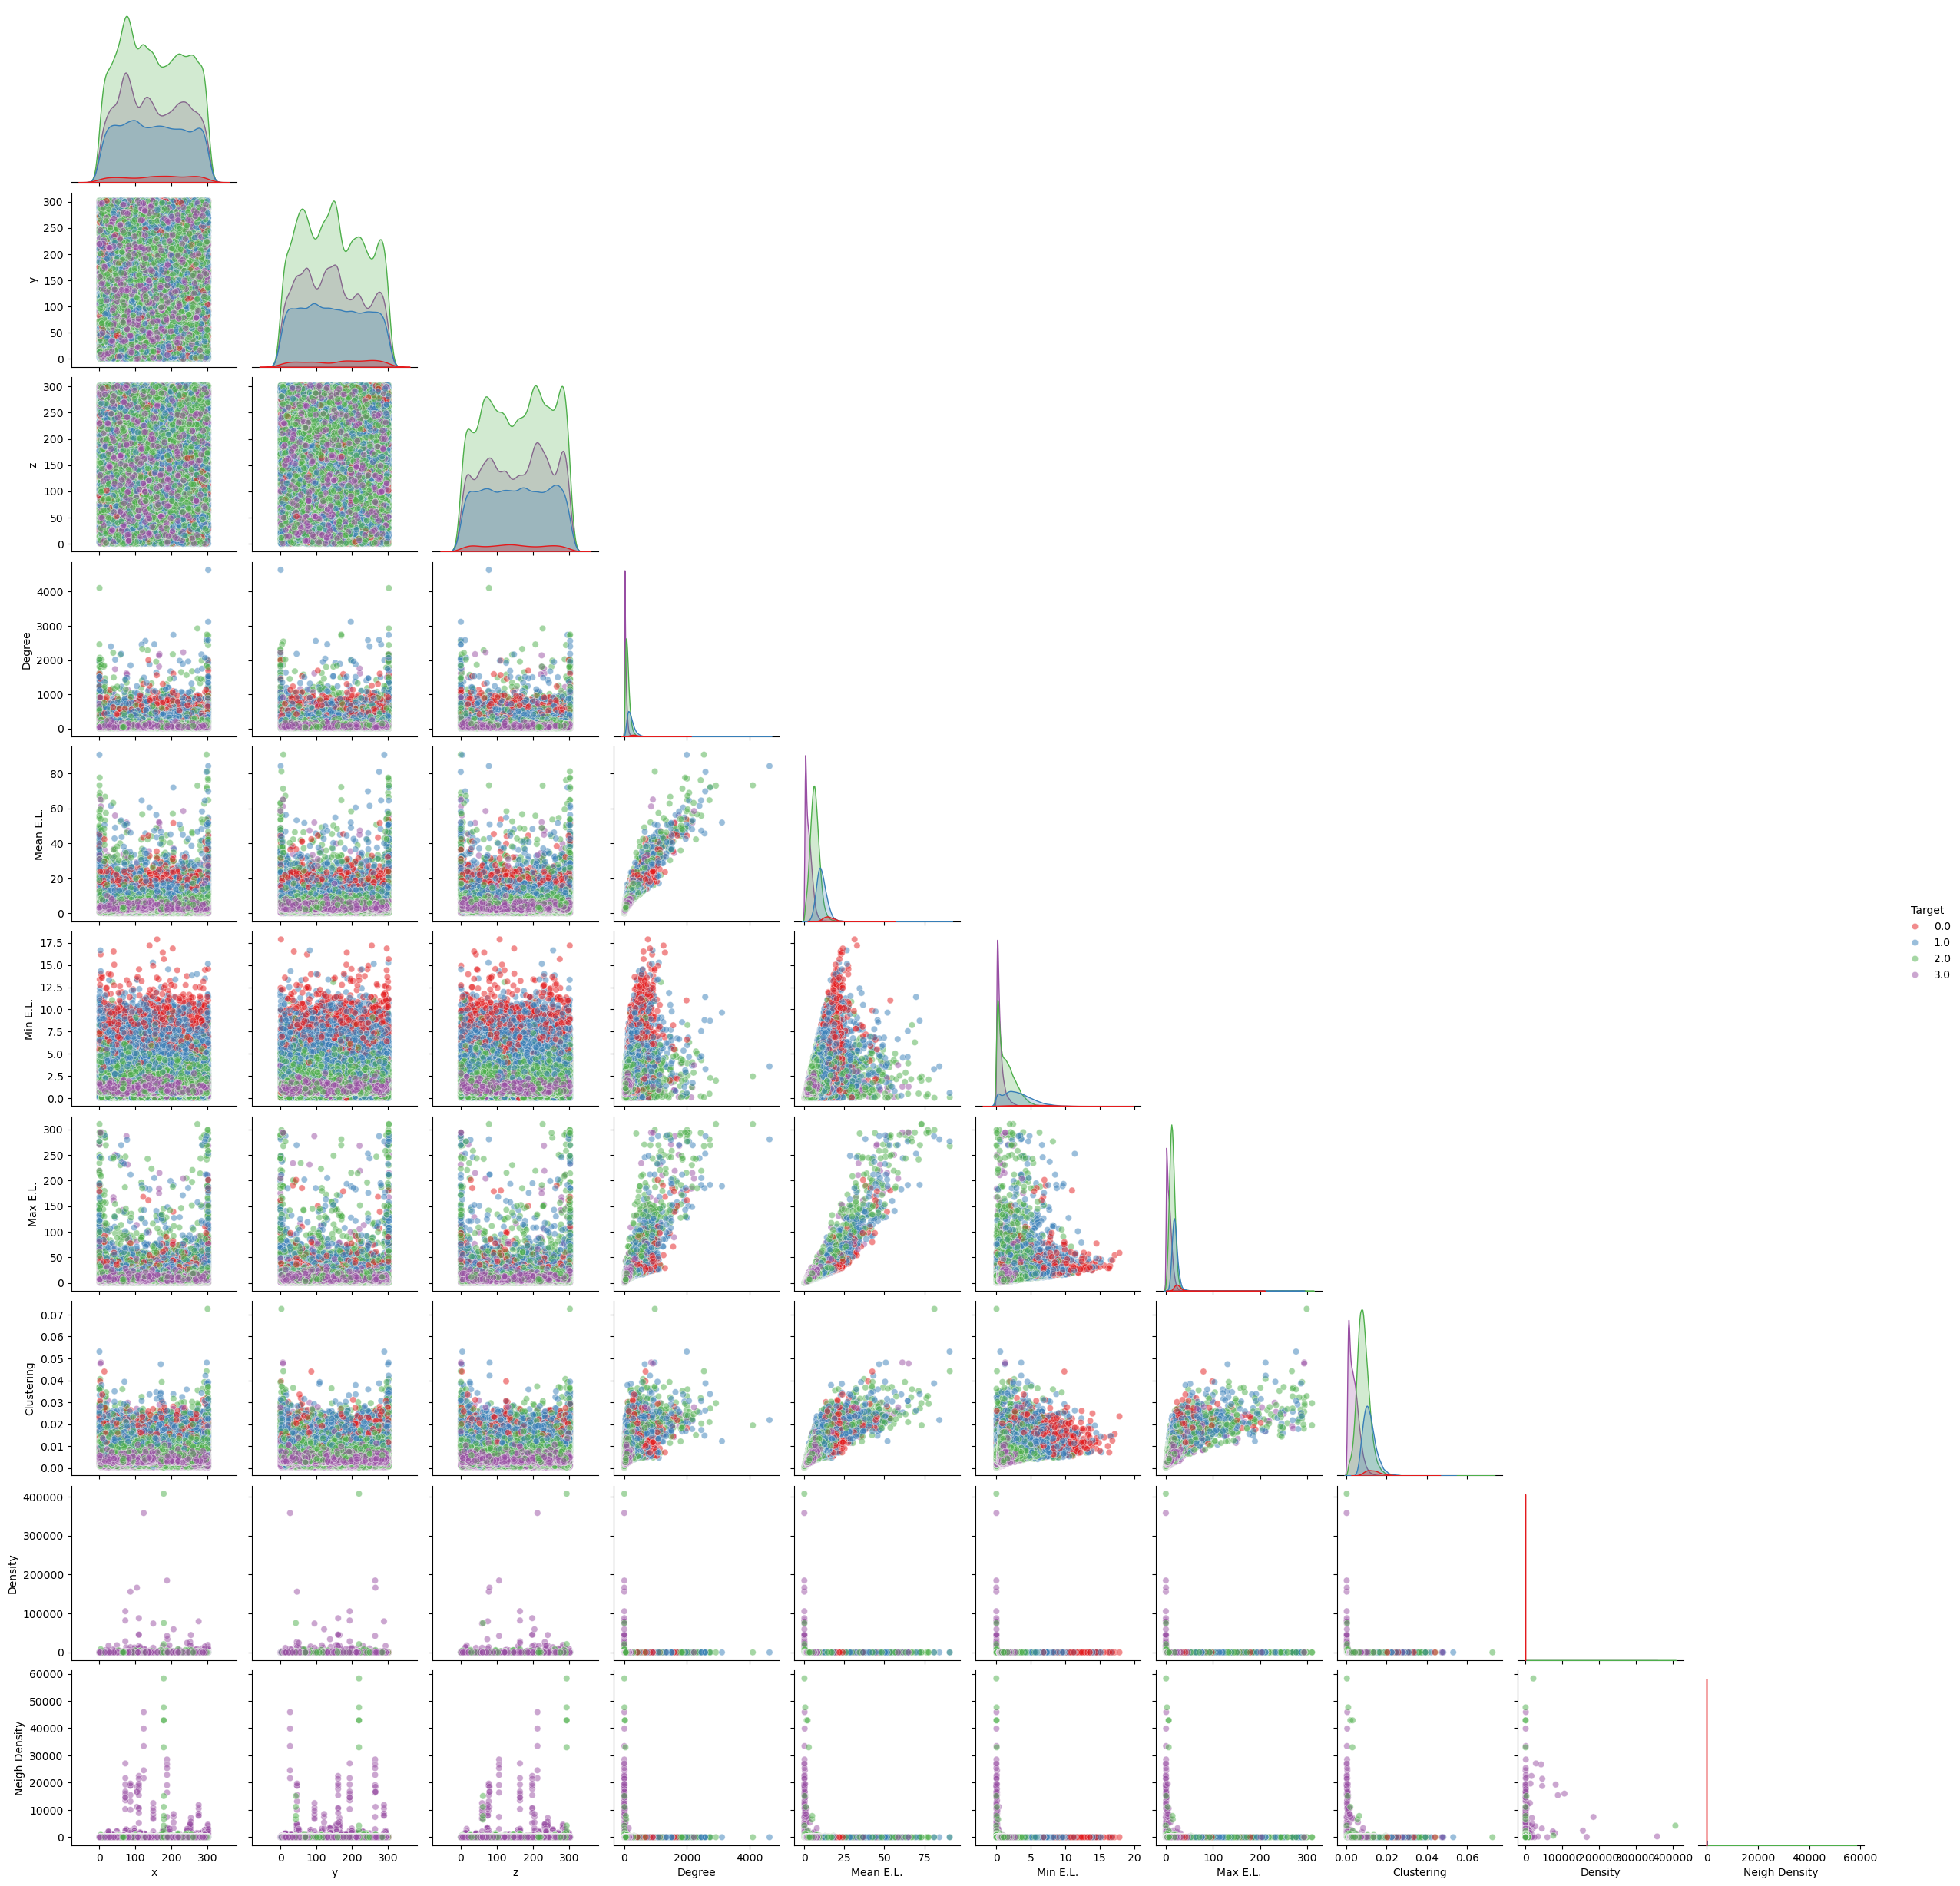

In [30]:
# Pairplot of the original data
pairplot = sns.pairplot(tab2, hue='Target', palette='Set1', diag_kind='kde', markers='o', plot_kws={'alpha':0.5}, corner=True)

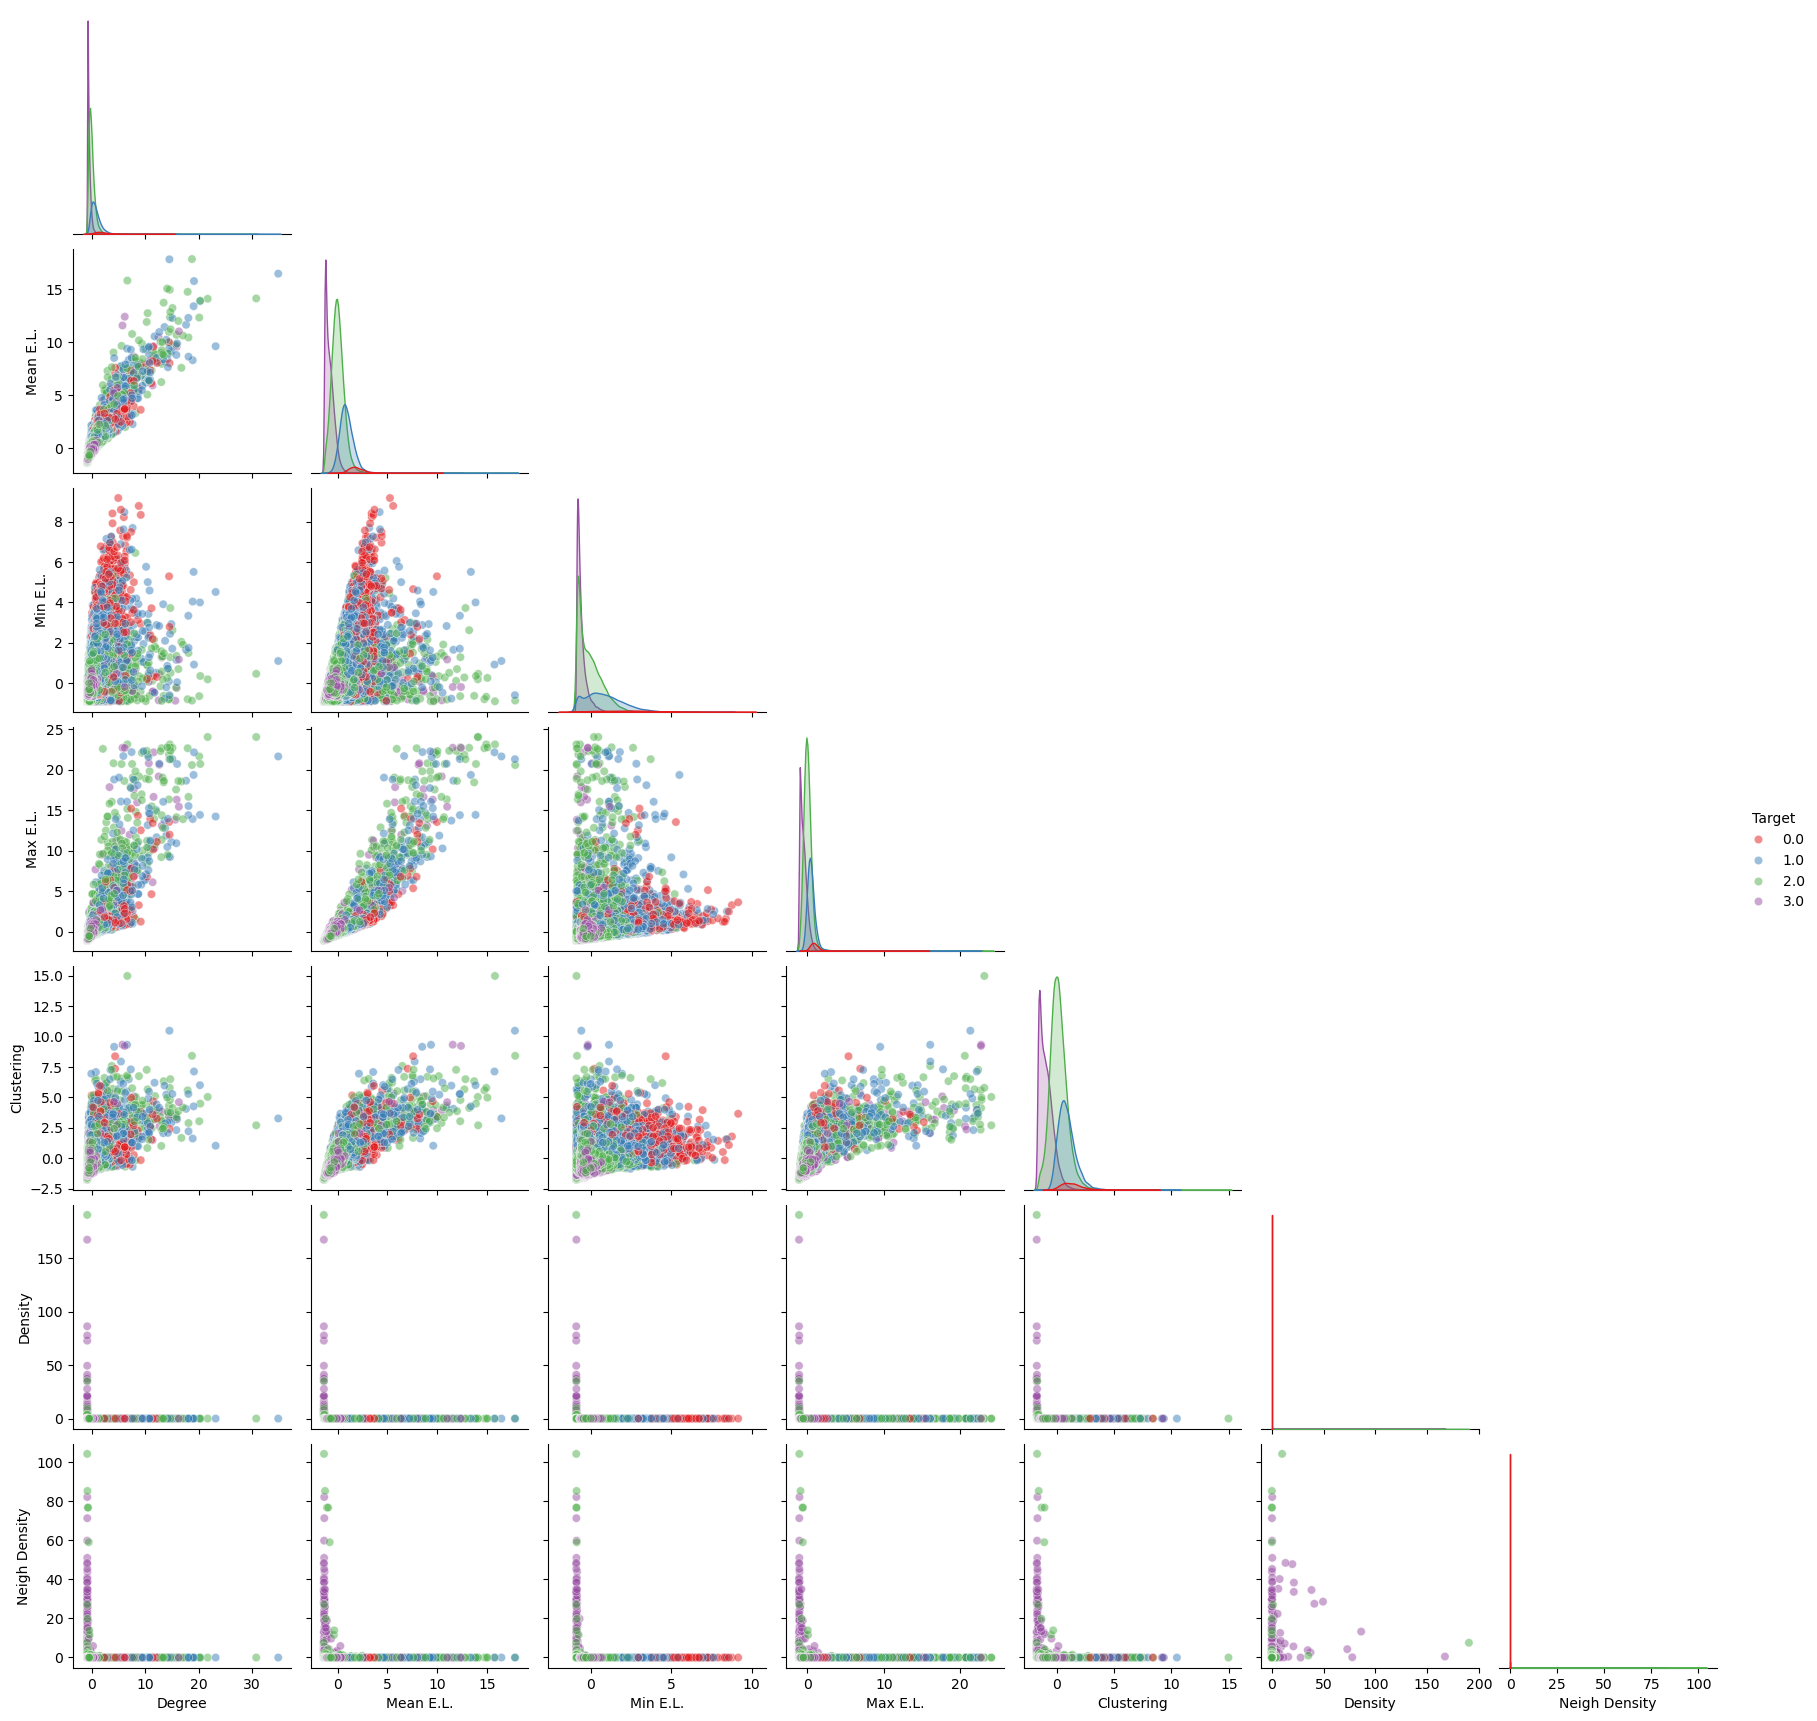

In [19]:
# Pairplot of the standard scaled data
pairplot_standard = sns.pairplot(tab_standard, hue='Target', palette='Set1', diag_kind='kde', markers='o', plot_kws={'alpha':0.5}, corner=True)

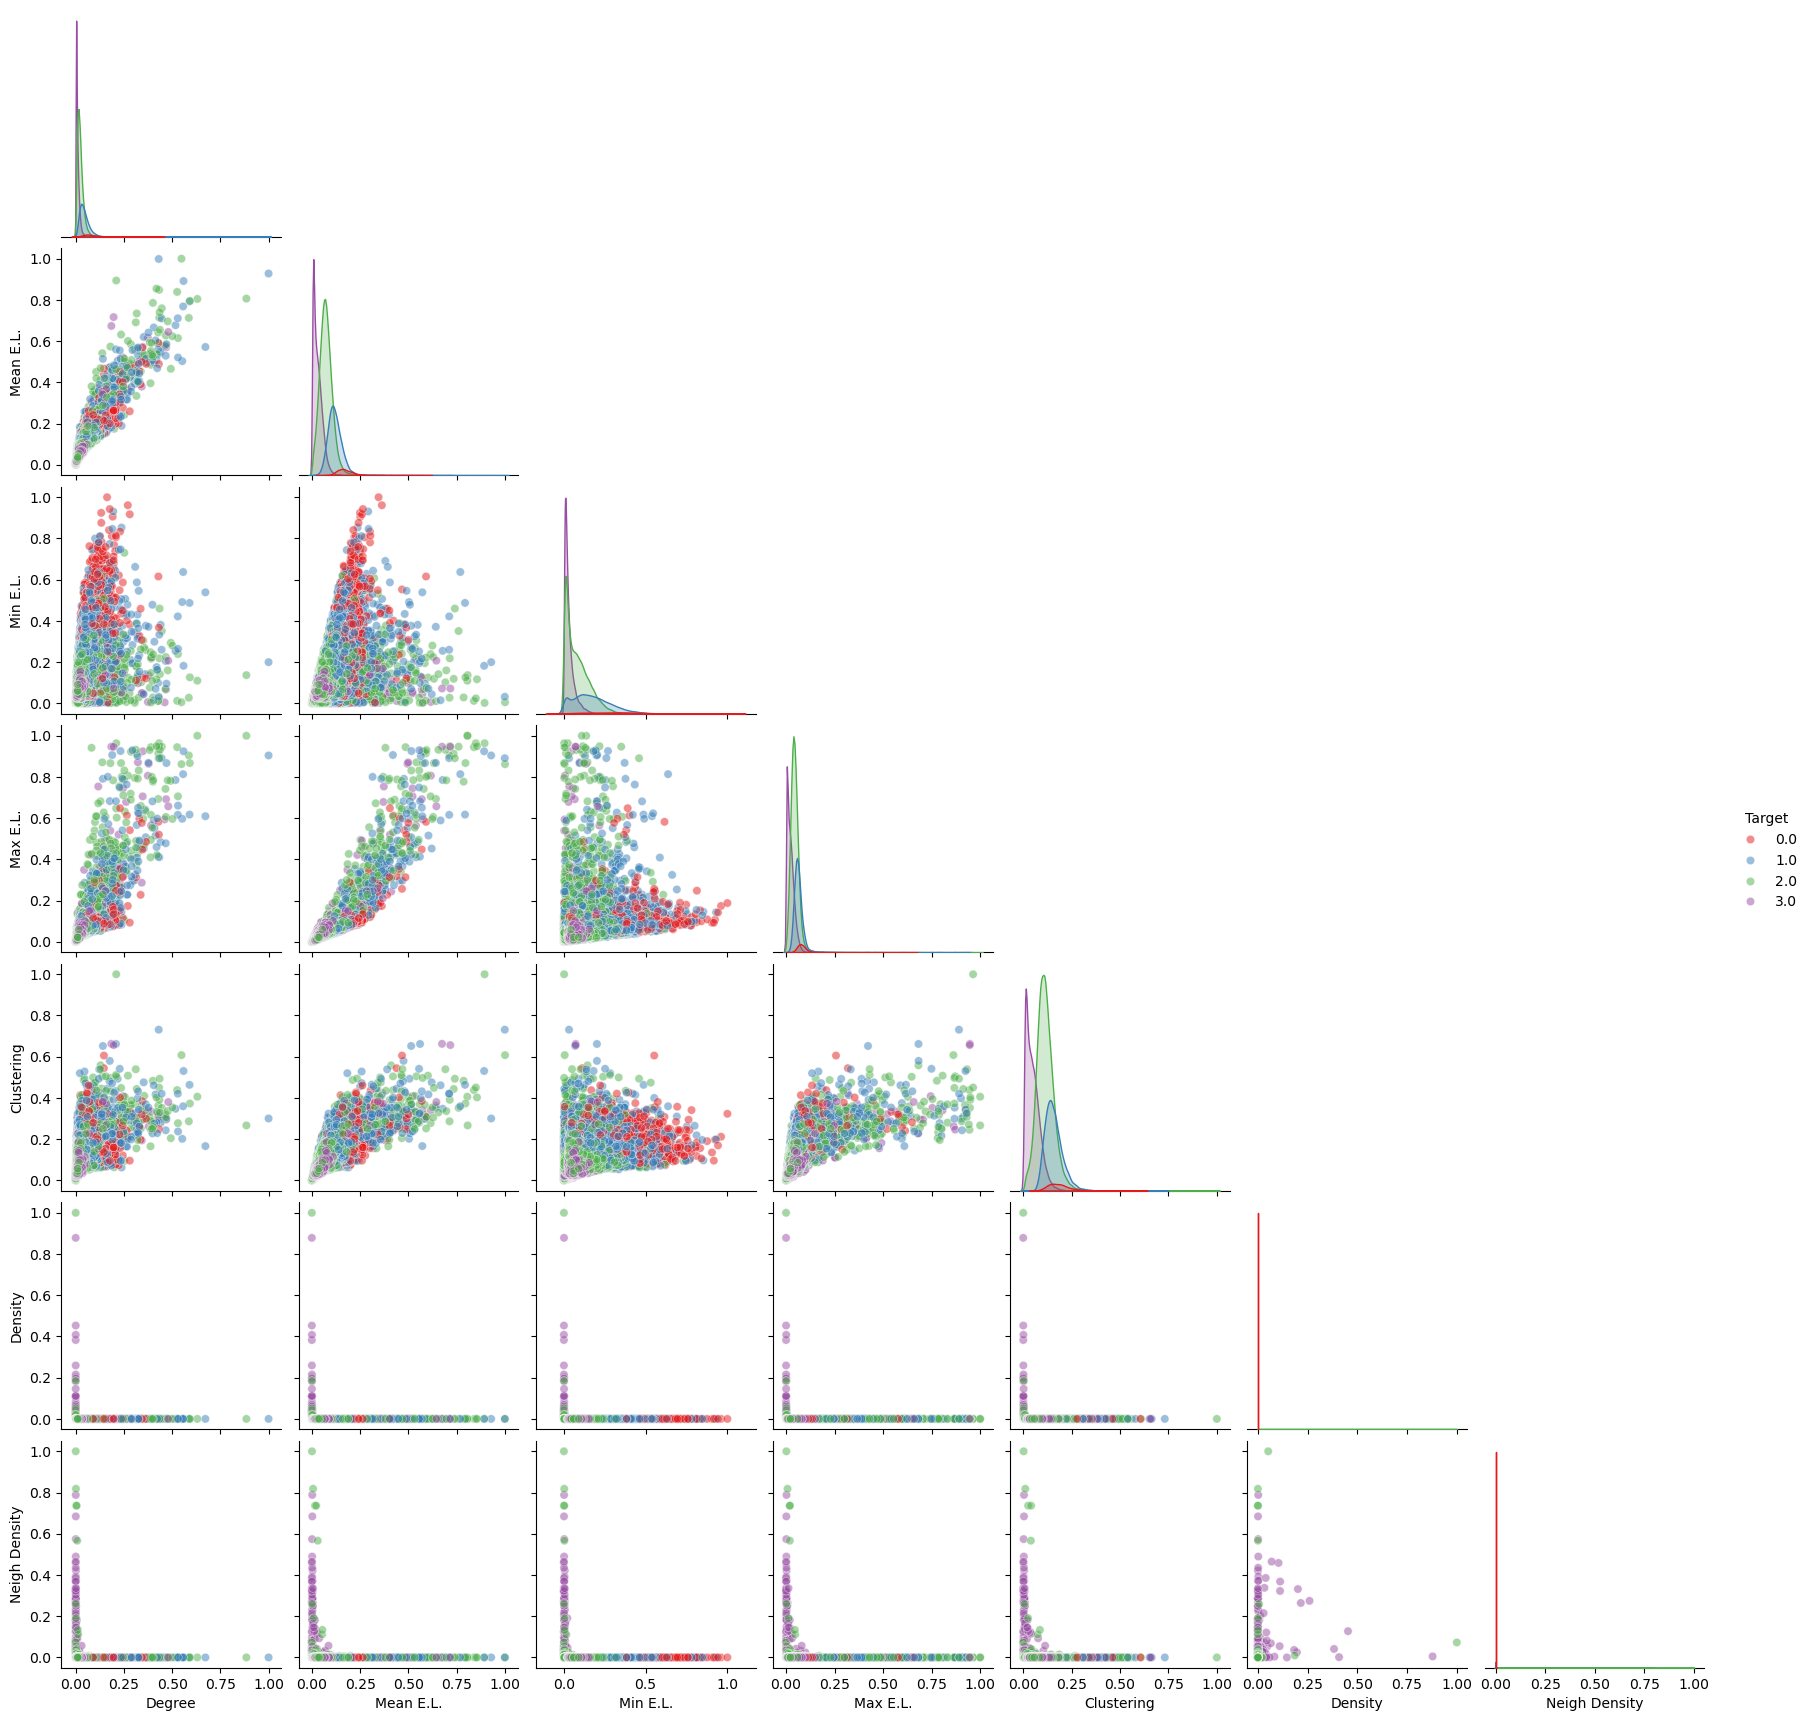

In [20]:
# Pairplot with minmax scaling
pairplot = sns.pairplot(tab_minmax, hue='Target', palette='Set1', diag_kind='kde', markers='o', plot_kws={'alpha':0.5}, corner=True)


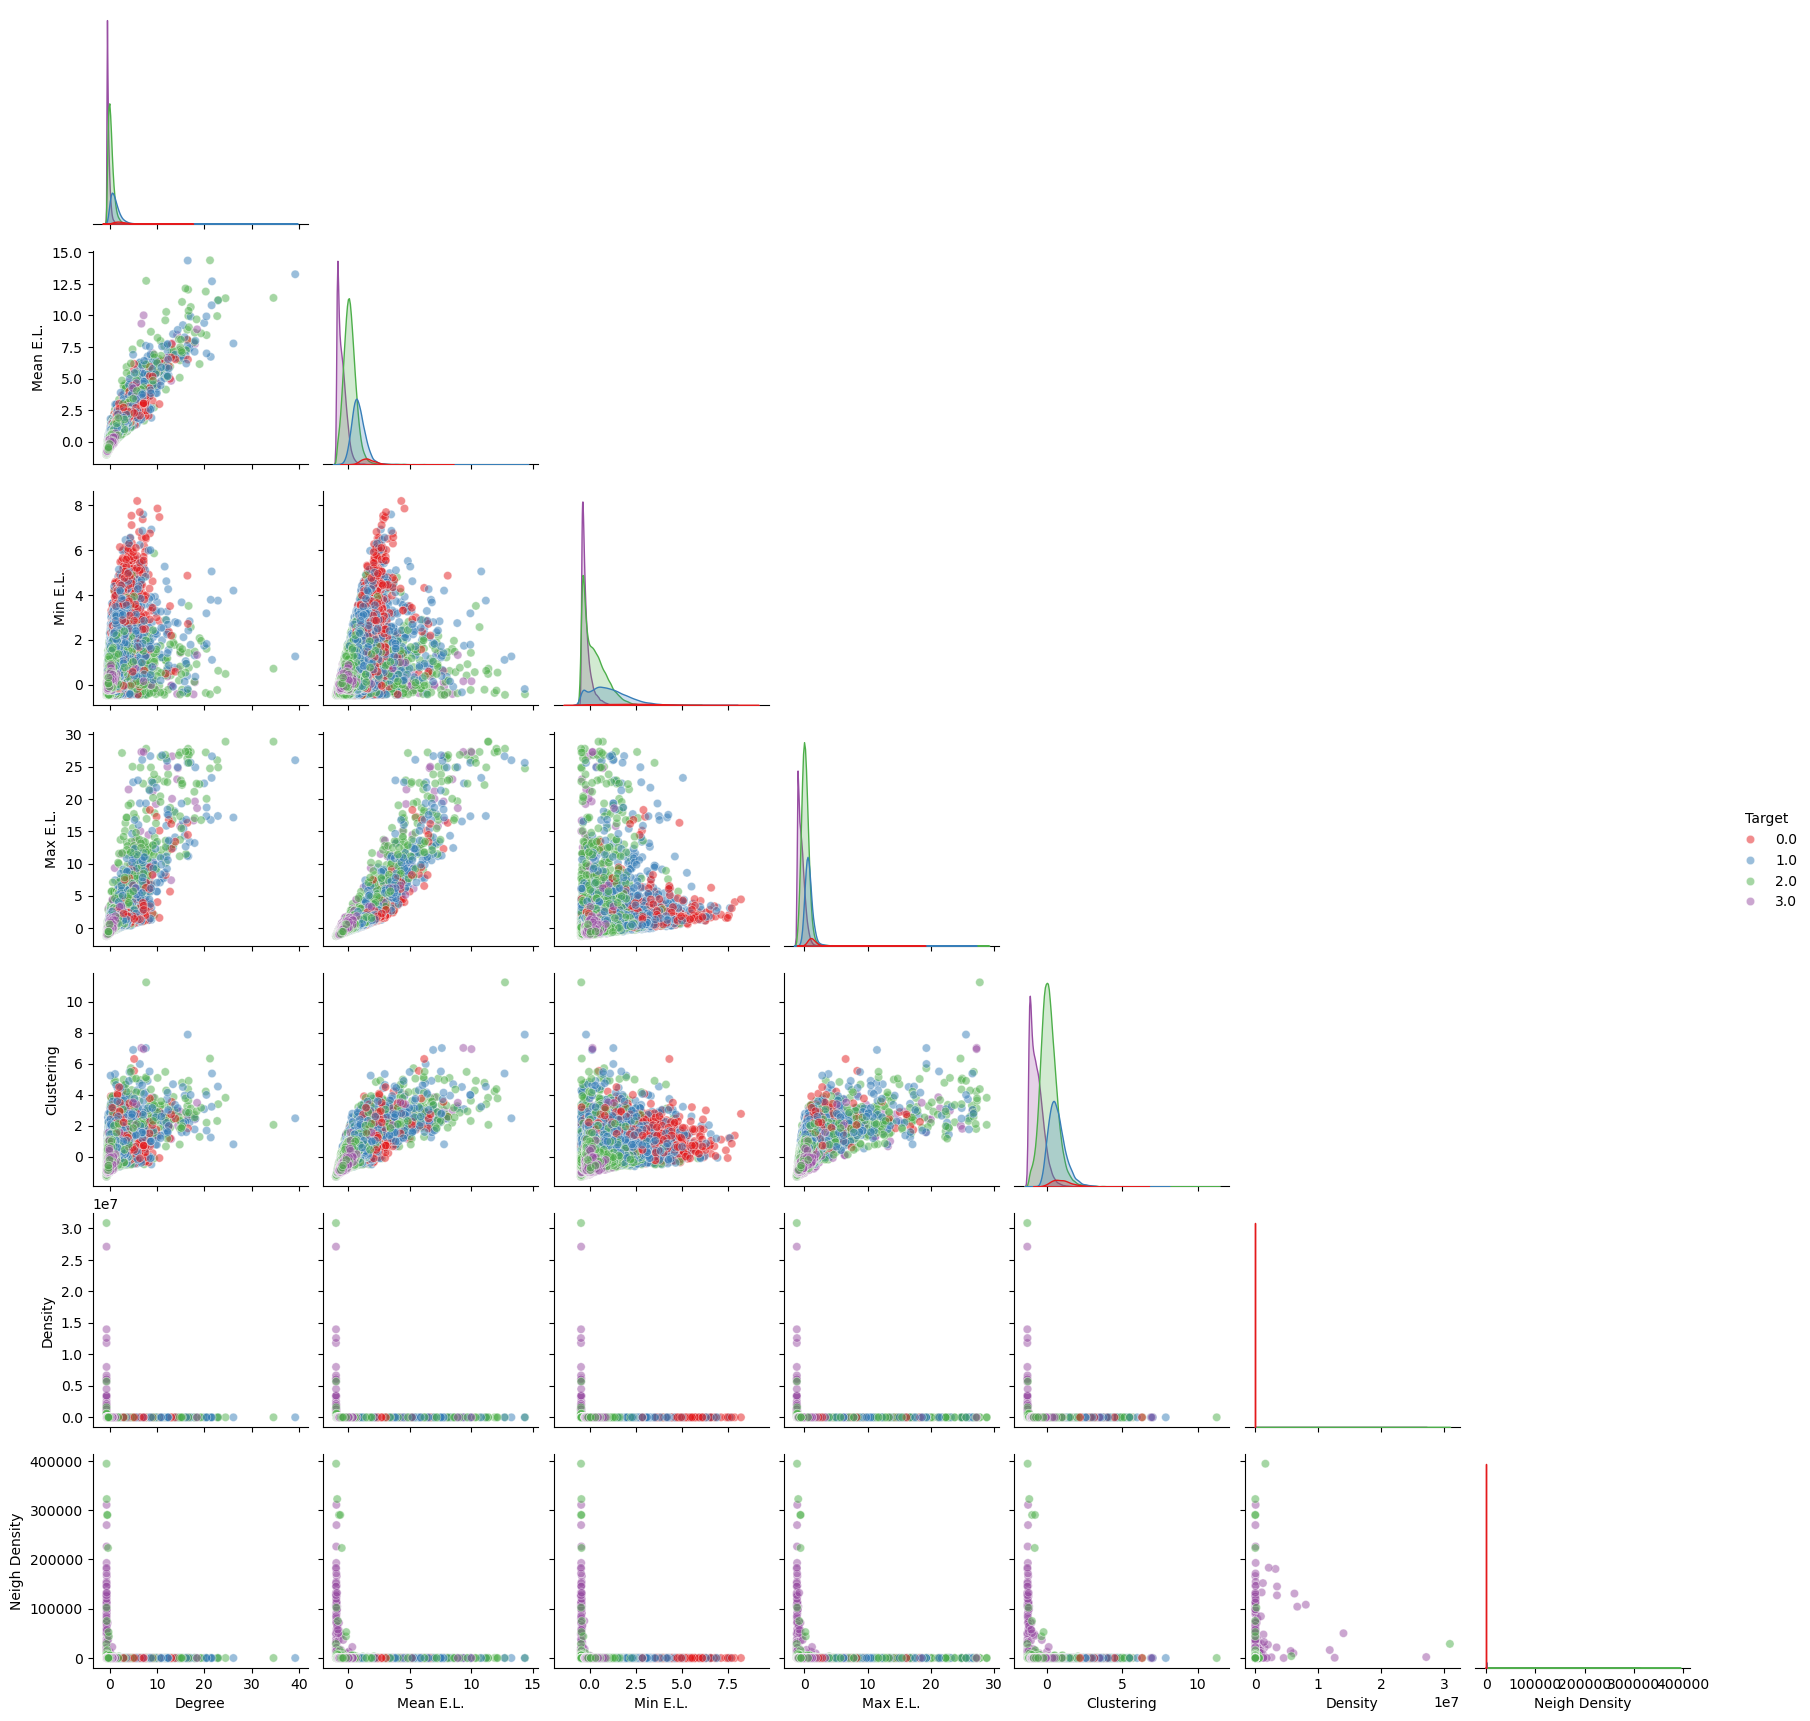

In [21]:
# Plot the pairplot of the data

# Pairplot with robust scaling and making sure density and neigh density are not inverse
pairplot = sns.pairplot(tab_robust, hue='Target', palette='Set1', diag_kind='kde', markers='o', plot_kws={'alpha':0.5}, corner=True)




In [122]:
# # Now doing same plot with 5 subplots for 0,1,2,3 and combined
# extent = [-5, 4, -2, 5]
# fig, axs = plt.subplots(2, 3, figsize=(25, 20))
# h0=axs[0, 0].hexbin(tab[tab['Target'] == 0]['Density'], tab[tab['Target'] == 0]['Degree'], bins='log', cmap='Reds', xscale='log', yscale='log', extent=extent)
# axs[0, 0].set_title('Void (0)')
# axs[0, 0].set_xlabel('Density')
# axs[0, 0].set_ylabel('Degree')
# h1=axs[0, 1].hexbin(tab[tab['Target'] == 1]['Density'], tab[tab['Target'] == 1]['Degree'], bins='log', cmap='Greens', xscale='log', yscale='log', extent=extent)
# axs[0, 1].set_title('Sheet (1)')
# axs[0, 1].set_xlabel('Density')
# axs[0, 1].set_ylabel('Degree')
# h2=axs[0, 2].hexbin(tab[tab['Target'] == 2]['Density'], tab[tab['Target'] == 2]['Degree'], bins='log', cmap='Blues', xscale='log', yscale='log', extent=extent)
# axs[0, 2].set_title('Filament (2)')
# axs[0, 2].set_xlabel('Density')
# axs[0, 2].set_ylabel('Degree')
# h3=axs[1, 0].hexbin(tab[tab['Target'] == 3]['Density'], tab[tab['Target'] == 3]['Degree'], bins='log', cmap='Purples', xscale='log', yscale='log', extent=extent)
# axs[1, 0].set_title('Cluster (3)')
# axs[1, 0].set_xlabel('Density')
# axs[1, 0].set_ylabel('Degree')
# h4=axs[1, 1].hexbin(tab['Density'], tab['Degree'], bins='log', cmap='inferno', xscale='log', yscale='log', extent=extent)
# axs[1, 1].set_title('Combined')
# axs[1, 1].set_xlabel('Density')
# axs[1, 1].set_ylabel('Degree')

# # fig.colorbar(h0, ax=axs[0, 0], orientation='vertical', label='Void')
# # fig.colorbar(h1, ax=axs[0, 1], orientation='vertical', label='Sheet')
# # fig.colorbar(h2, ax=axs[0, 2], orientation='vertical', label='Filament')
# # fig.colorbar(h3, ax=axs[1, 0], orientation='vertical', label='Cluster')
# # fig.colorbar(h4, ax=axs[1, 1], orientation='vertical', label='Combined')
# fig.delaxes(axs[1, 2])

# plt.tight_layout()

# plt.show()


# # plt.figure(figsize=(25, 10))


# # plt.rcParams.update({'font.size': 22})
# # plt.xlabel('log(Density)')
# # plt.ylabel('log(Degree)')
# # #h = plt.hist2d(np.log10(tab['Density']), np.log10(tab['Degree']), range=[[-4, 4], [0.2, 5]], bins=100)#, cmin=50, bins=50, cmap='Greys', range=[[-4, 1.2], [0.2, 3]]) 
# # alpha = 0.5
# # range = [[-4, 4], [0.2, 5]]
# # h3 = plt.hexbin(np.log10(tab[tab['Target'] == 3]['Density']), np.log10(tab[tab['Target'] == 3]['Degree']), alpha=alpha, cmap='Purples', bins='log')
# # h0 = plt.hexbin(np.log10(tab[tab['Target'] == 0]['Density']), np.log10(tab[tab['Target'] == 0]['Degree']), alpha=alpha, cmap='Reds', bins='log')
# # h1 = plt.hexbin(np.log10(tab[tab['Target'] == 1]['Density']), np.log10(tab[tab['Target'] == 1]['Degree']), alpha=alpha, cmap='Greens', bins='log')
# # h2 = plt.hexbin(np.log10(tab[tab['Target'] == 2]['Density']), np.log10(tab[tab['Target'] == 2]['Degree']), alpha=alpha, cmap='Blues', bins = 'log')
# # plt.colorbar(h3, orientation='vertical', label='Cluster (3)')
# # plt.colorbar(h2, orientation='vertical', label='Filament (2)')
# # plt.colorbar(h1, orientation='vertical', label='Sheet (1)')
# # plt.colorbar(h0, orientation='vertical', label='Void (0)')


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:4993: RuntimeWarning: divide by zero encountered in divide
  ix = (tx - xmin) / sx
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:4995: RuntimeWarning: invalid value encountered in cast
  ix1 = np.round(ix).astype(int)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:4997: RuntimeWarning: invalid value encountered in cast
  ix2 = np.floor(ix).astype(int)


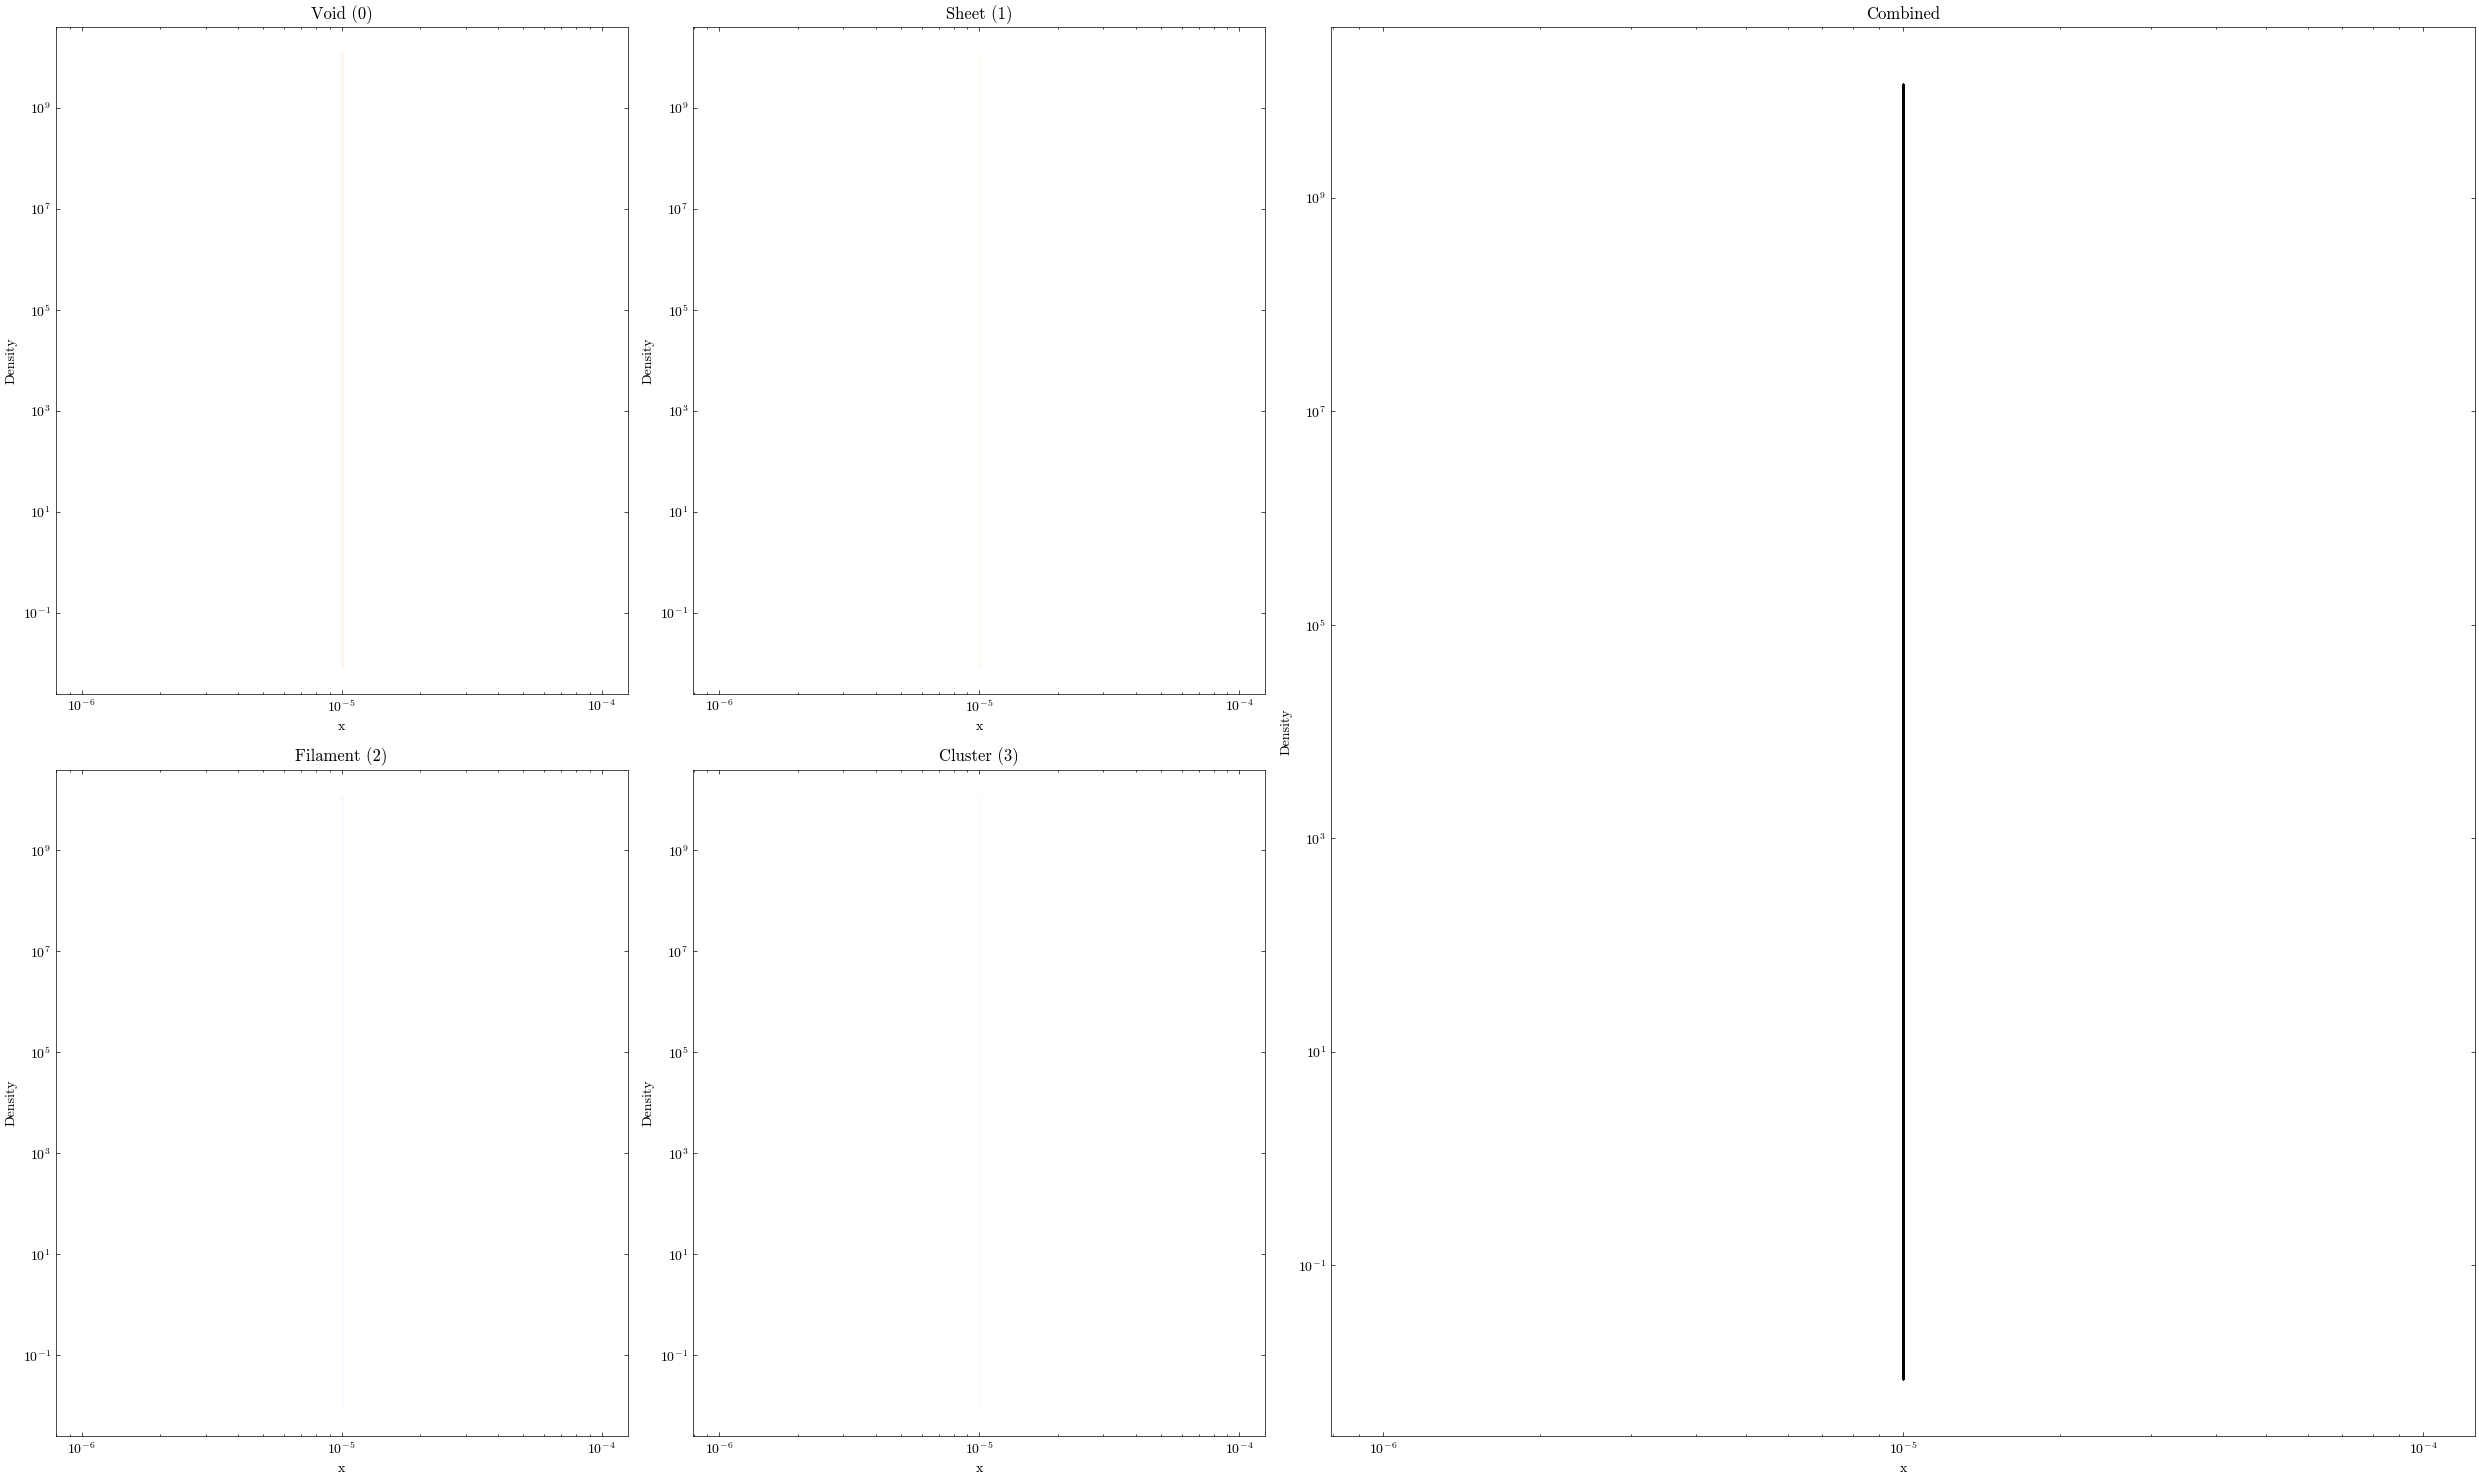

In [89]:
# Doing same as above but with gridspec so that the combined plot is bigger
# Plotting the cross correlations of the data
x = 'x'
y = 'Density'
tab = tab2 ############################################################################################################# Change this to tab_standard, tab_minmax, tab_robust
xscale = 'log'
yscale = 'log'
bins = 'log'
from matplotlib import gridspec

# extent = None
if y == 'Degree':
    extent = [-7, 4, -2, 5]
elif y == 'Clustering':
    extent = [-10, 4, -5, 2]
else:
    extent = [-5, -5, -2, 10]

fig = plt.figure(figsize=(25, 15))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 2])
ax0 = plt.subplot(gs[(0,0)])
ax1 = plt.subplot(gs[(0,1)])
ax2 = plt.subplot(gs[(1,0)])
ax3 = plt.subplot(gs[(1,1)])
ax4 = plt.subplot(gs[:,2])

ax0.hexbin(tab[tab['Target'] == 0][x], tab[tab['Target'] == 0][y], bins=bins, cmap='Reds', xscale=xscale, yscale=yscale, extent=extent)
ax0.set_title('Void (0)')
ax0.set_xlabel(x)
ax0.set_ylabel(y)
ax1.hexbin(tab[tab['Target'] == 1][x], tab[tab['Target'] == 1][y], bins=bins, cmap='Greens', xscale=xscale, yscale=yscale, extent=extent)
ax1.set_title('Sheet (1)')
ax1.set_xlabel(x)
ax1.set_ylabel(y)
ax2.hexbin(tab[tab['Target'] == 2][x], tab[tab['Target'] == 2][y], bins=bins, cmap='Blues', xscale=xscale, yscale=yscale, extent=extent)
ax2.set_title('Filament (2)')
ax2.set_xlabel(x)
ax2.set_ylabel(y)
ax3.hexbin(tab[tab['Target'] == 3][x], tab[tab['Target'] == 3][y], bins=bins, cmap='Purples', xscale=xscale, yscale=yscale, extent=extent)
ax3.set_title('Cluster (3)')
ax3.set_xlabel(x)
ax3.set_ylabel(y)
ax4.hexbin(tab[x], tab[y], bins=bins, cmap='inferno', xscale=xscale, yscale=yscale, extent=extent)
ax4.set_title('Combined')
ax4.set_xlabel(x)
ax4.set_ylabel(y)

plt.tight_layout()

Inverting the densities to supposedly remove trends is wrong because density is positively correlated with the other metrics the issues is a minority of extreme values. Despite then using Standard scaler, minmax, and robust scaler they were not able to handle these extreme values - therefore we should look at other scaling methods. But first let's check the distributions of density and neigh density.

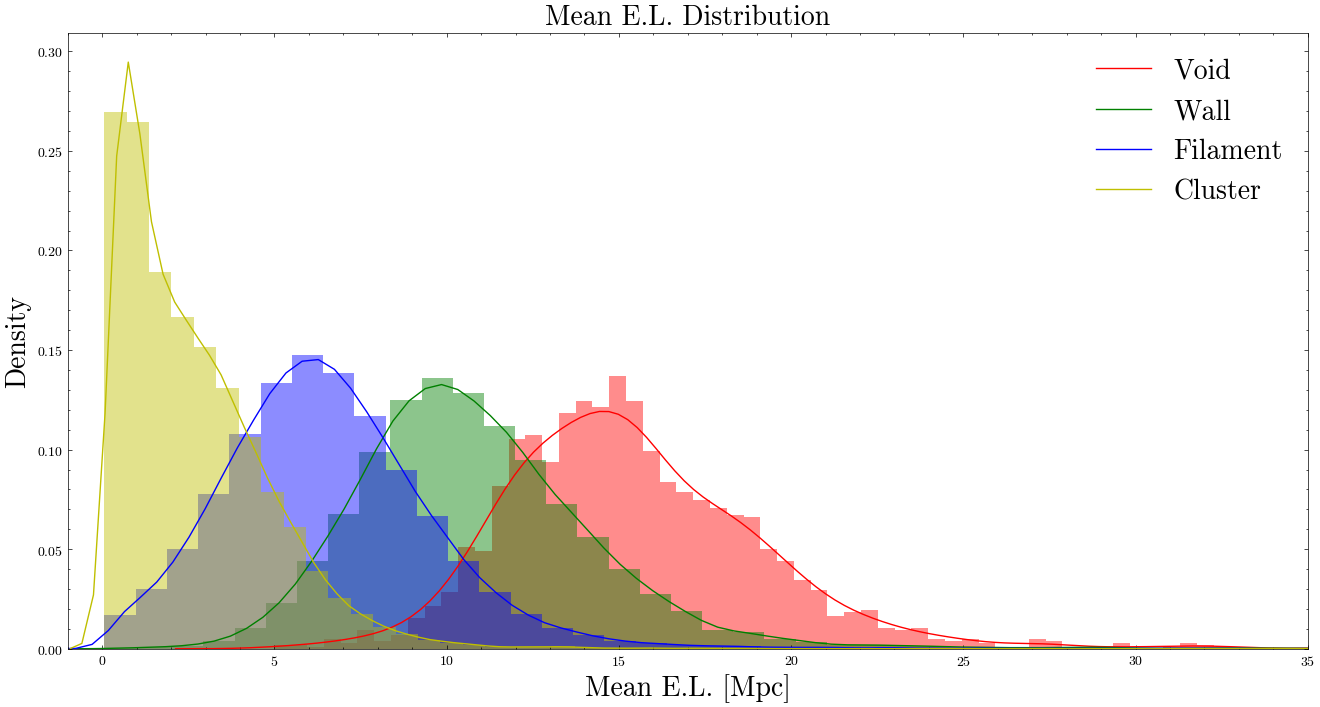

In [87]:
# Histogram of Mean E.L for poster presentation
import scienceplots
plt.style.use(['science','no-latex'])

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.hist(tab2[tab2['Target'] == 0]['Mean E.L.'], bins=100, alpha=0.45, color='r', density=True)
sns.kdeplot(tab2[tab2['Target'] == 0]['Mean E.L.'], color='r', ax=ax, label='Void')
ax.hist(tab2[tab2['Target'] == 1]['Mean E.L.'], bins=100, alpha=0.45, color='g', density=True)
sns.kdeplot(tab2[tab2['Target'] == 1]['Mean E.L.'], color='g', ax=ax, label='Wall')
ax.hist(tab2[tab2['Target'] == 2]['Mean E.L.'], bins=100, alpha=0.45, color='b',  density=True)
sns.kdeplot(tab2[tab2['Target'] == 2]['Mean E.L.'], color='b', ax=ax, label='Filament')
ax.hist(tab2[tab2['Target'] == 3]['Mean E.L.'], bins=100, alpha=0.45, color='y', density=True)
sns.kdeplot(tab2[tab2['Target'] == 3]['Mean E.L.'], color='y', ax=ax, label='Cluster')
ax.set_xlim(-1, 35)
ax.legend(prop={'size': 20})
ax.set_xlabel('Mean E.L. [Mpc]', fontsize=20)
ax.set_ylabel('Density', fontsize=20)
ax.set_title('Mean E.L. Distribution', fontsize=20)
fig.savefig('/Users/daksheshkololgi/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Year 2/Poster/Mean E.L. Distribution.pdf')

Text(0, 0.5, 'Frequency')

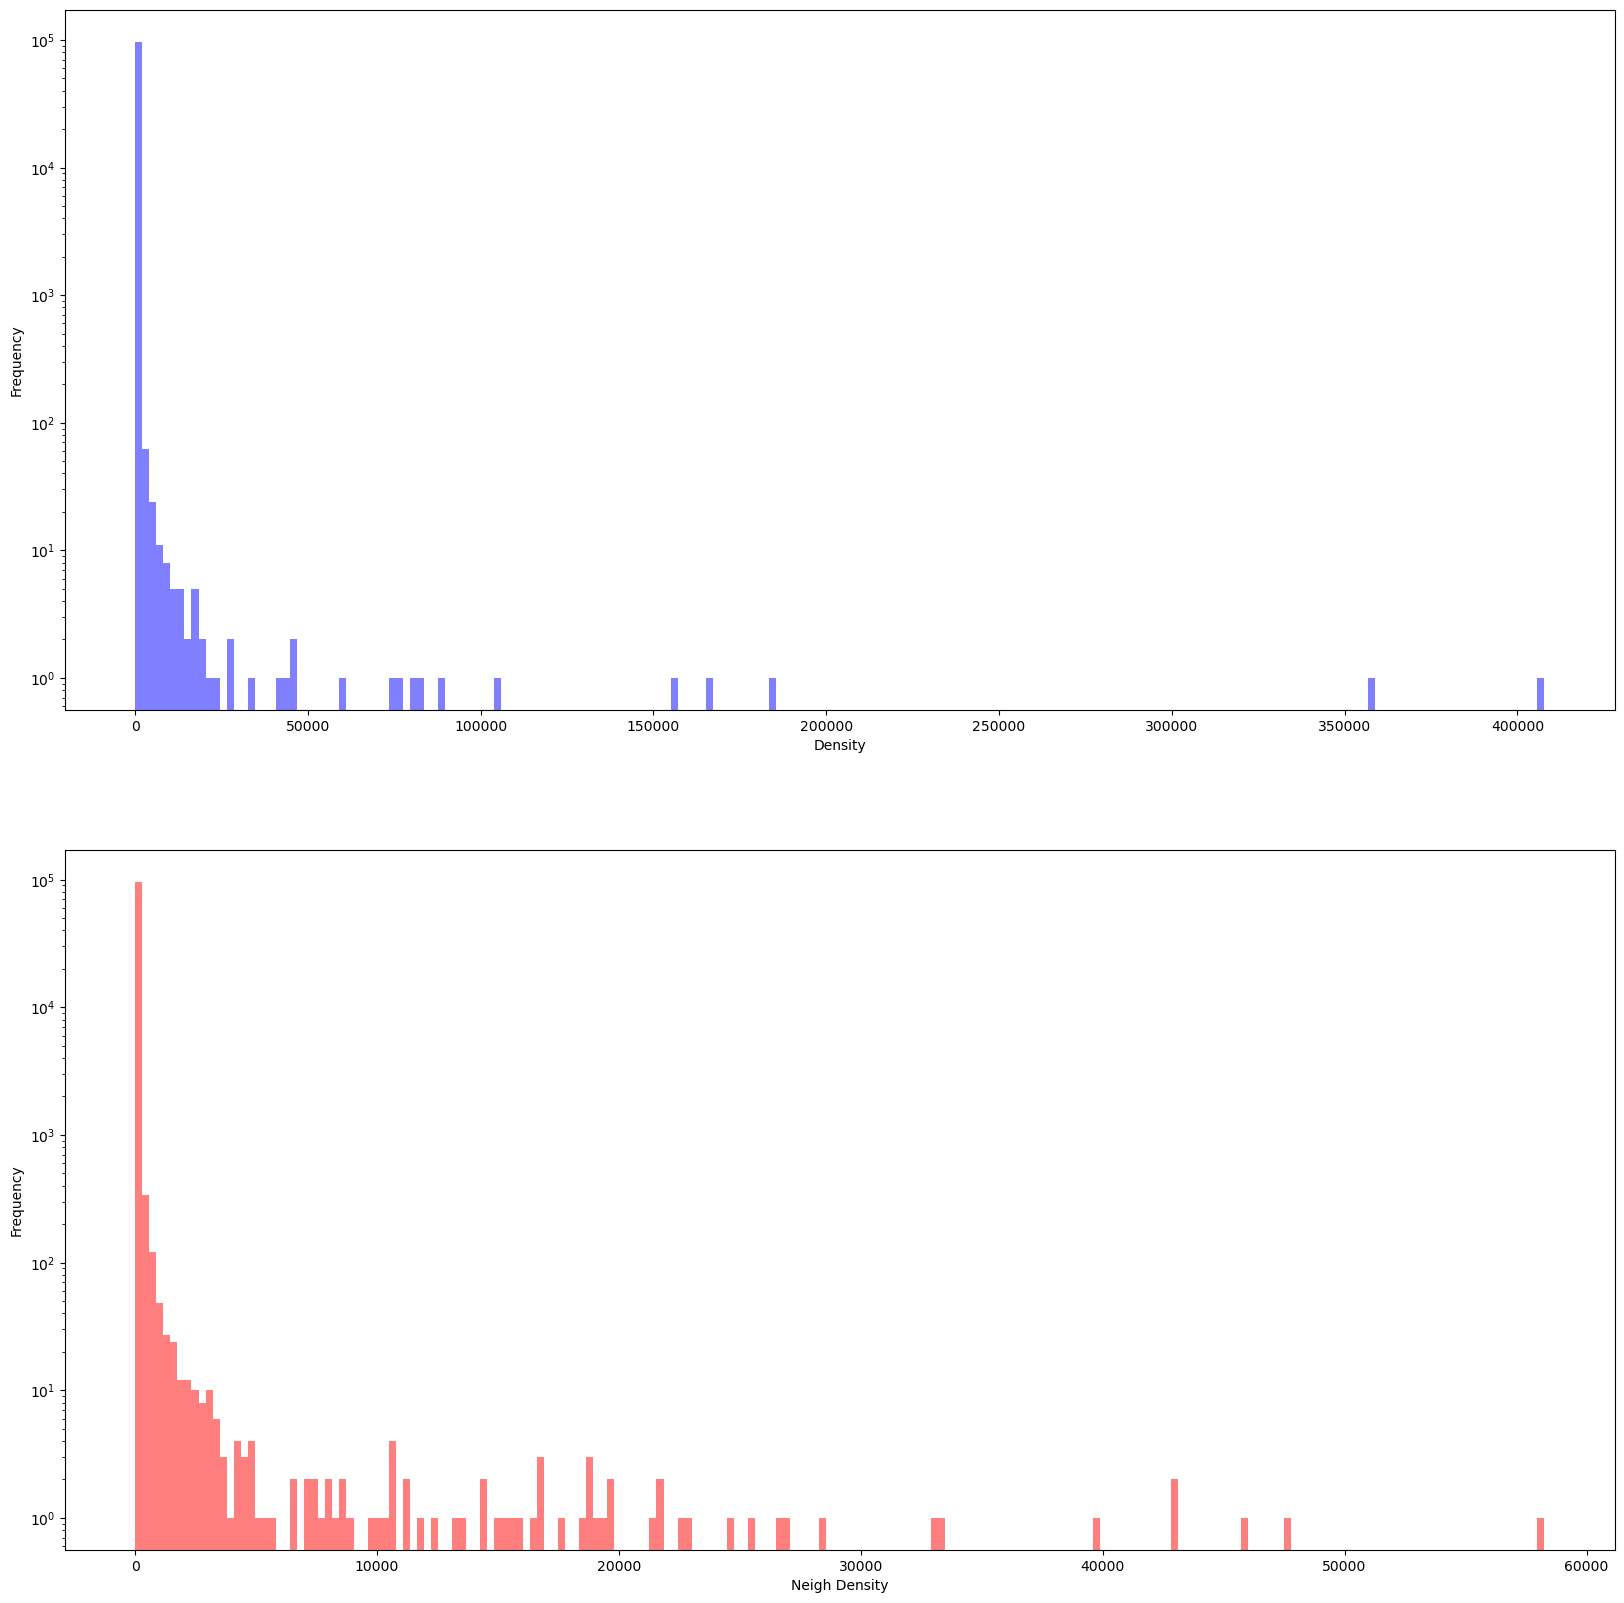

In [78]:
# Histogram of Density and Neigh Density for tab2, tab_standard, tab_minmax and tab_robust with log scale
fig, axs = plt.subplots(2, figsize=(20, 20))

axs[0].hist(tab2['Density'], bins=200, color='blue', alpha=0.5, label='Density', log=True)
axs[1].hist(tab2['Neigh Density'], bins=200, color='red', alpha=0.5, label='Neigh Density', log=True)
axs[0].set_xlabel('Density')
axs[1].set_xlabel('Neigh Density')
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')
# axs[0].set_xscale('log')
# axs[1].set_xscale('log')

The densities and neigh densities are distributed over several orders of magnitude with the vast majority of the data being near 0 (all are positive) A small minority are up to 5 or 4 orders of magnitude greater. Does the same hold for standard scaled, minmaxed and robust? Yes!

Text(0, 0.5, 'Frequency')

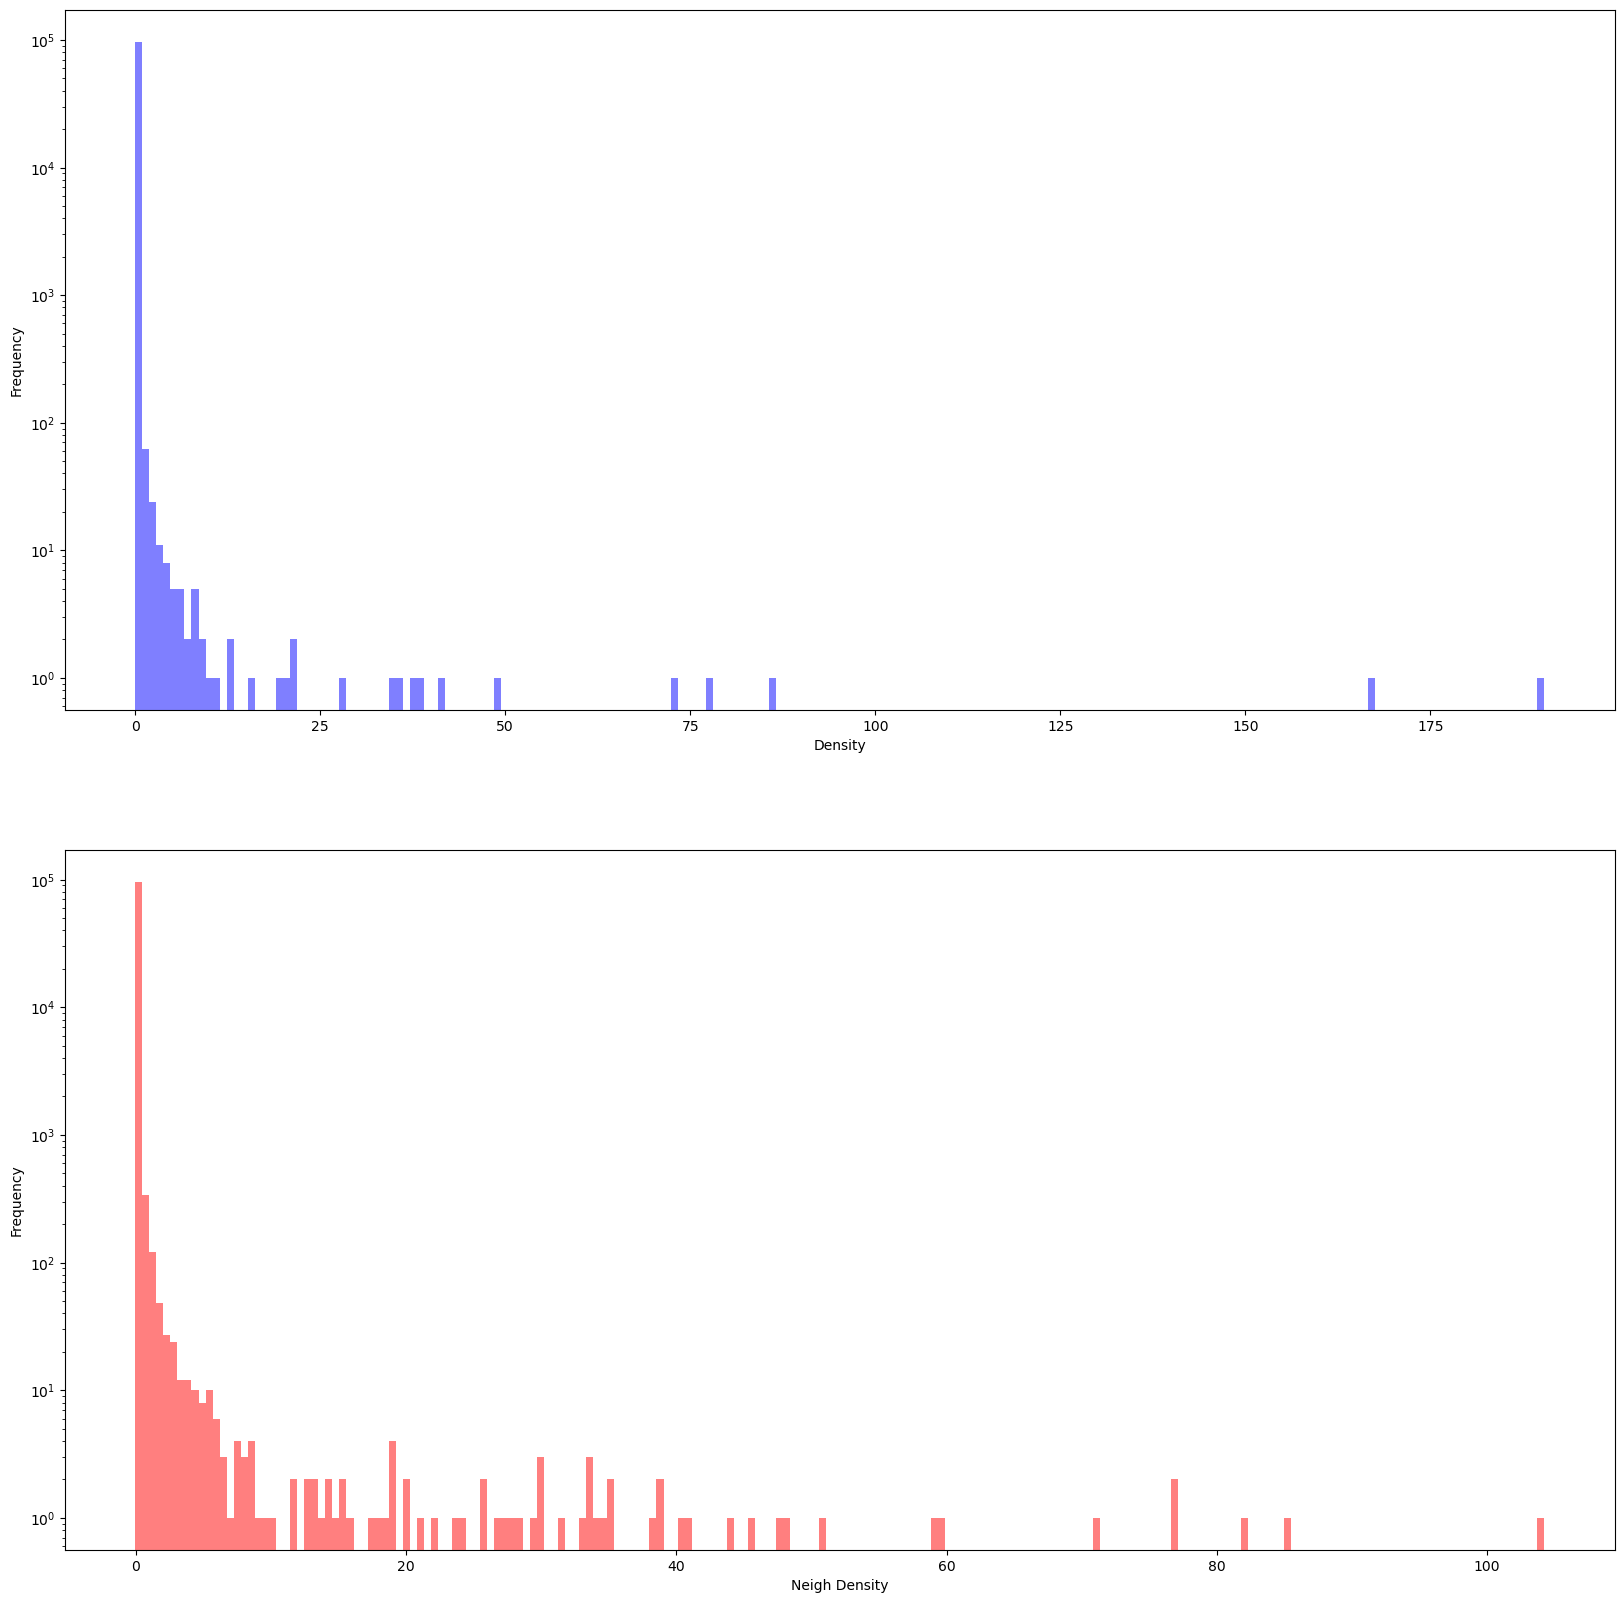

In [24]:
fig, axs  = plt.subplots(2, figsize=(20, 20))
axs[0].hist(tab_standard['Density'], bins=200, color='blue', alpha=0.5, label='Density', log=True)
axs[1].hist(tab_standard['Neigh Density'], bins=200, color='red', alpha=0.5, label='Neigh Density', log=True)
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Frequency')
axs[1].set_xlabel('Neigh Density')
axs[1].set_ylabel('Frequency')


Text(0, 0.5, 'Frequency')

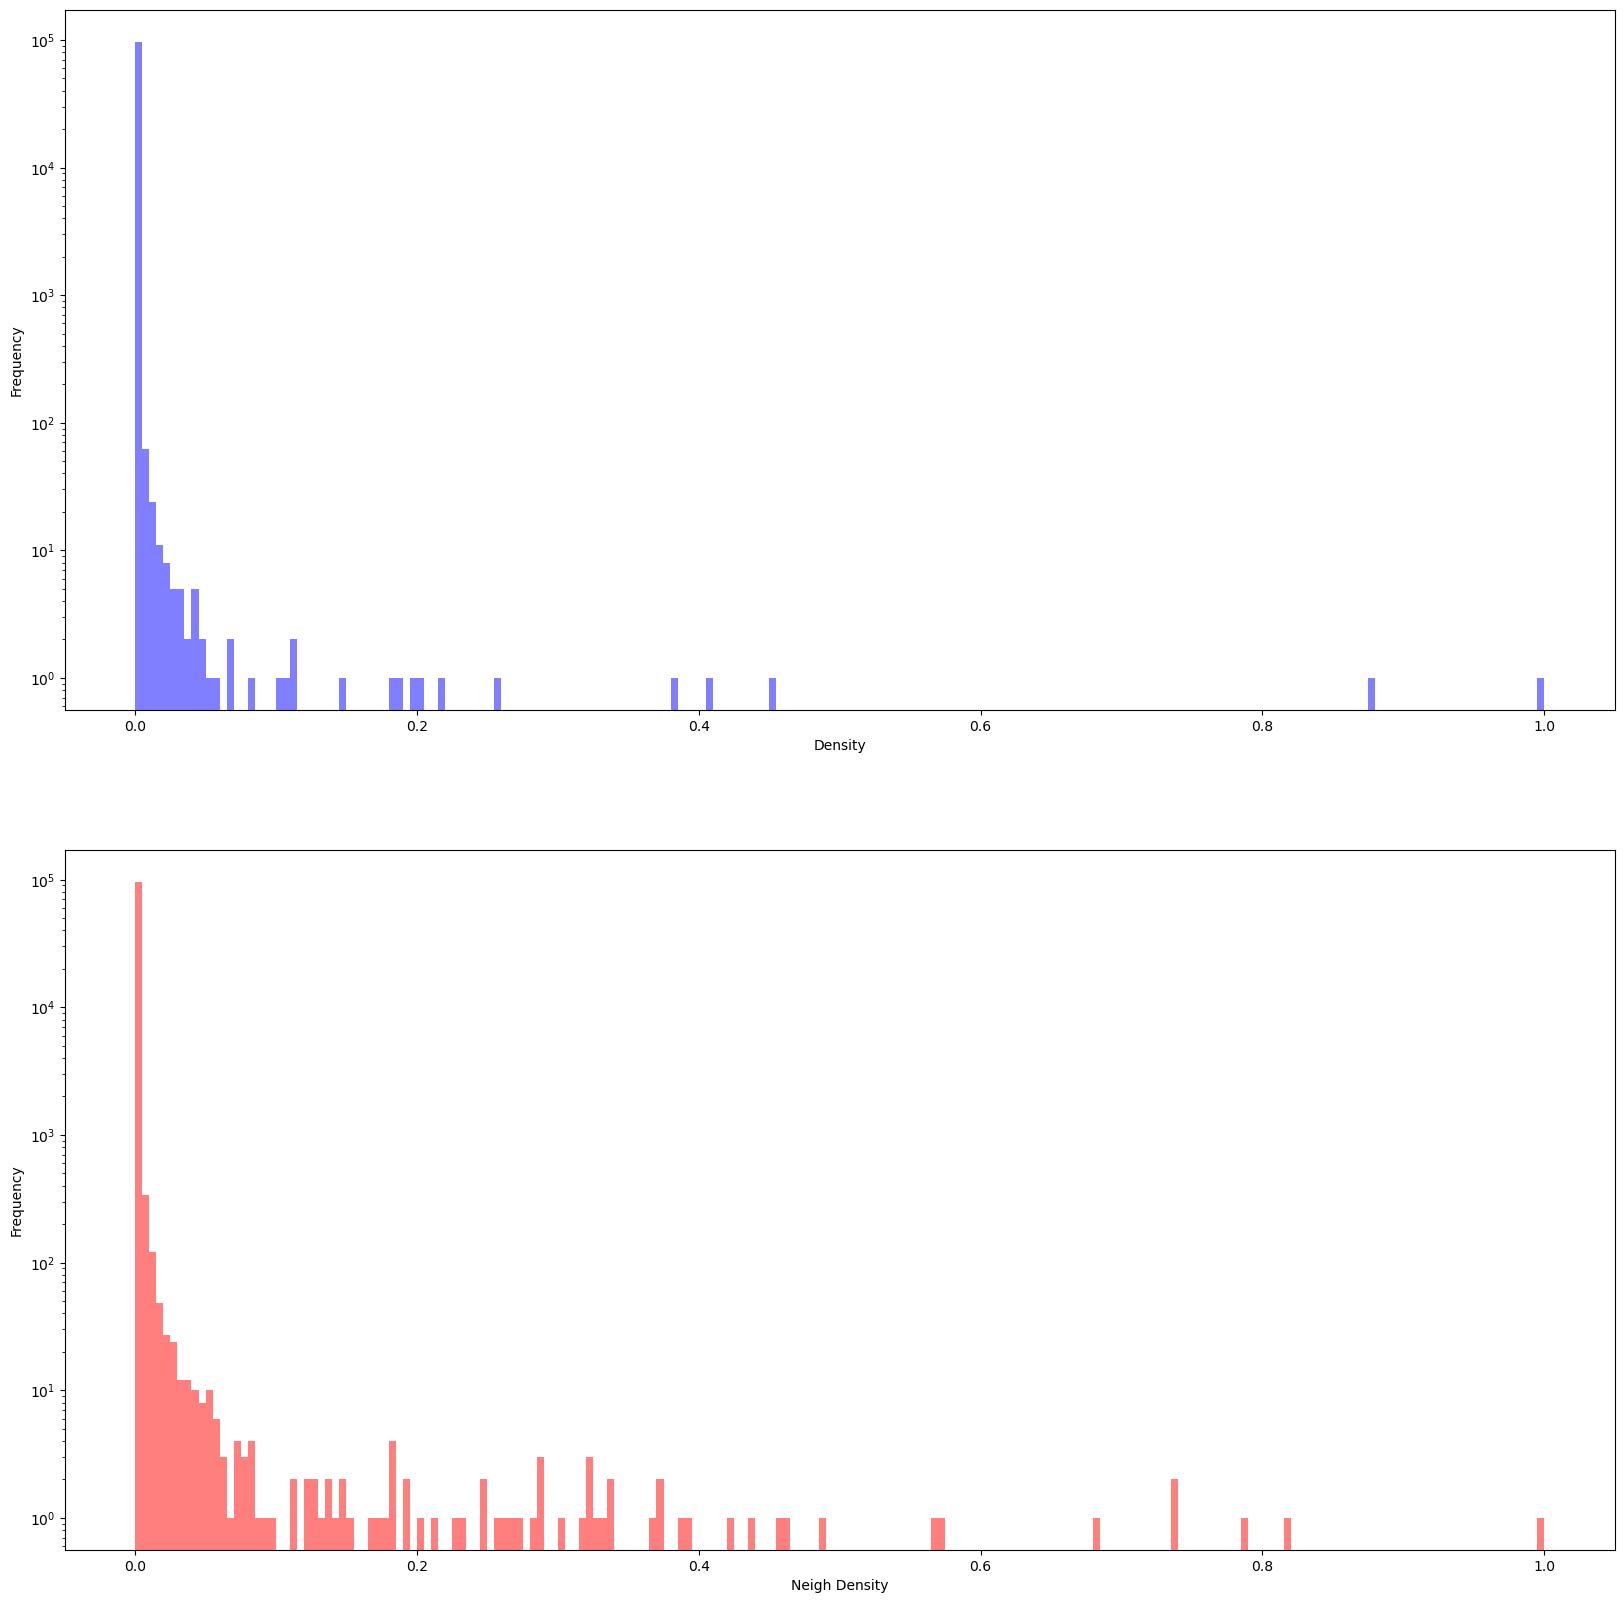

In [25]:
fig, axs  = plt.subplots(2, figsize=(20, 20))
axs[0].hist(tab_minmax['Density'], bins=200, color='blue', alpha=0.5, label='Density', log=True)
axs[1].hist(tab_minmax['Neigh Density'], bins=200, color='red', alpha=0.5, label='Neigh Density', log=True)
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Frequency')
axs[1].set_xlabel('Neigh Density')
axs[1].set_ylabel('Frequency')


Text(0, 0.5, 'Frequency')

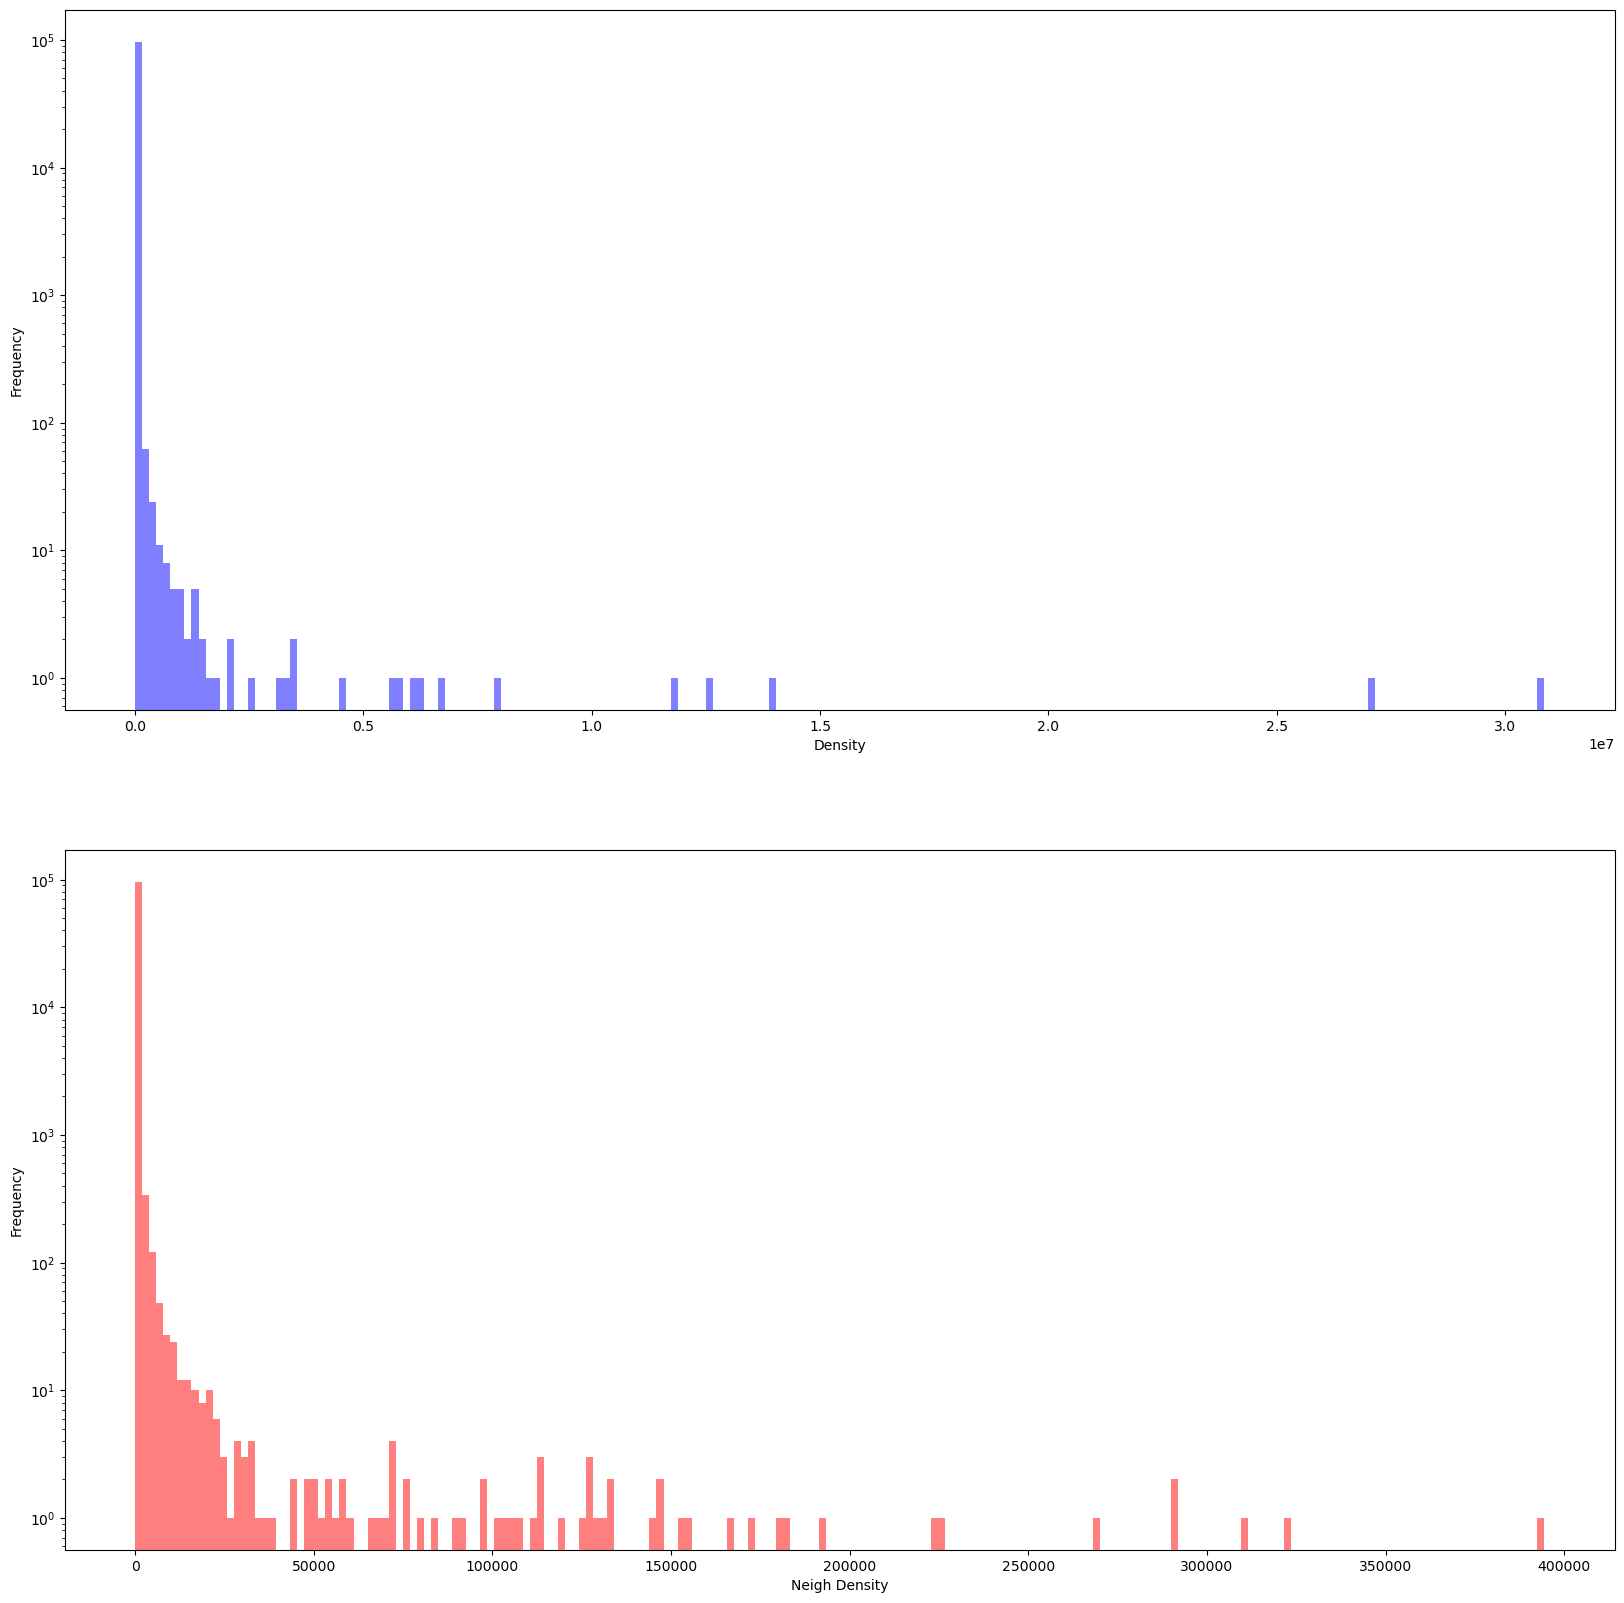

In [26]:
fig, axs  = plt.subplots(2, figsize=(20, 20))
axs[0].hist(tab_robust['Density'], bins=200, color='blue', alpha=0.5, label='Density', log=True)
axs[1].hist(tab_robust['Neigh Density'], bins=200, color='red', alpha=0.5, label='Neigh Density', log=True)
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Frequency')
axs[1].set_xlabel('Neigh Density')
axs[1].set_ylabel('Frequency')


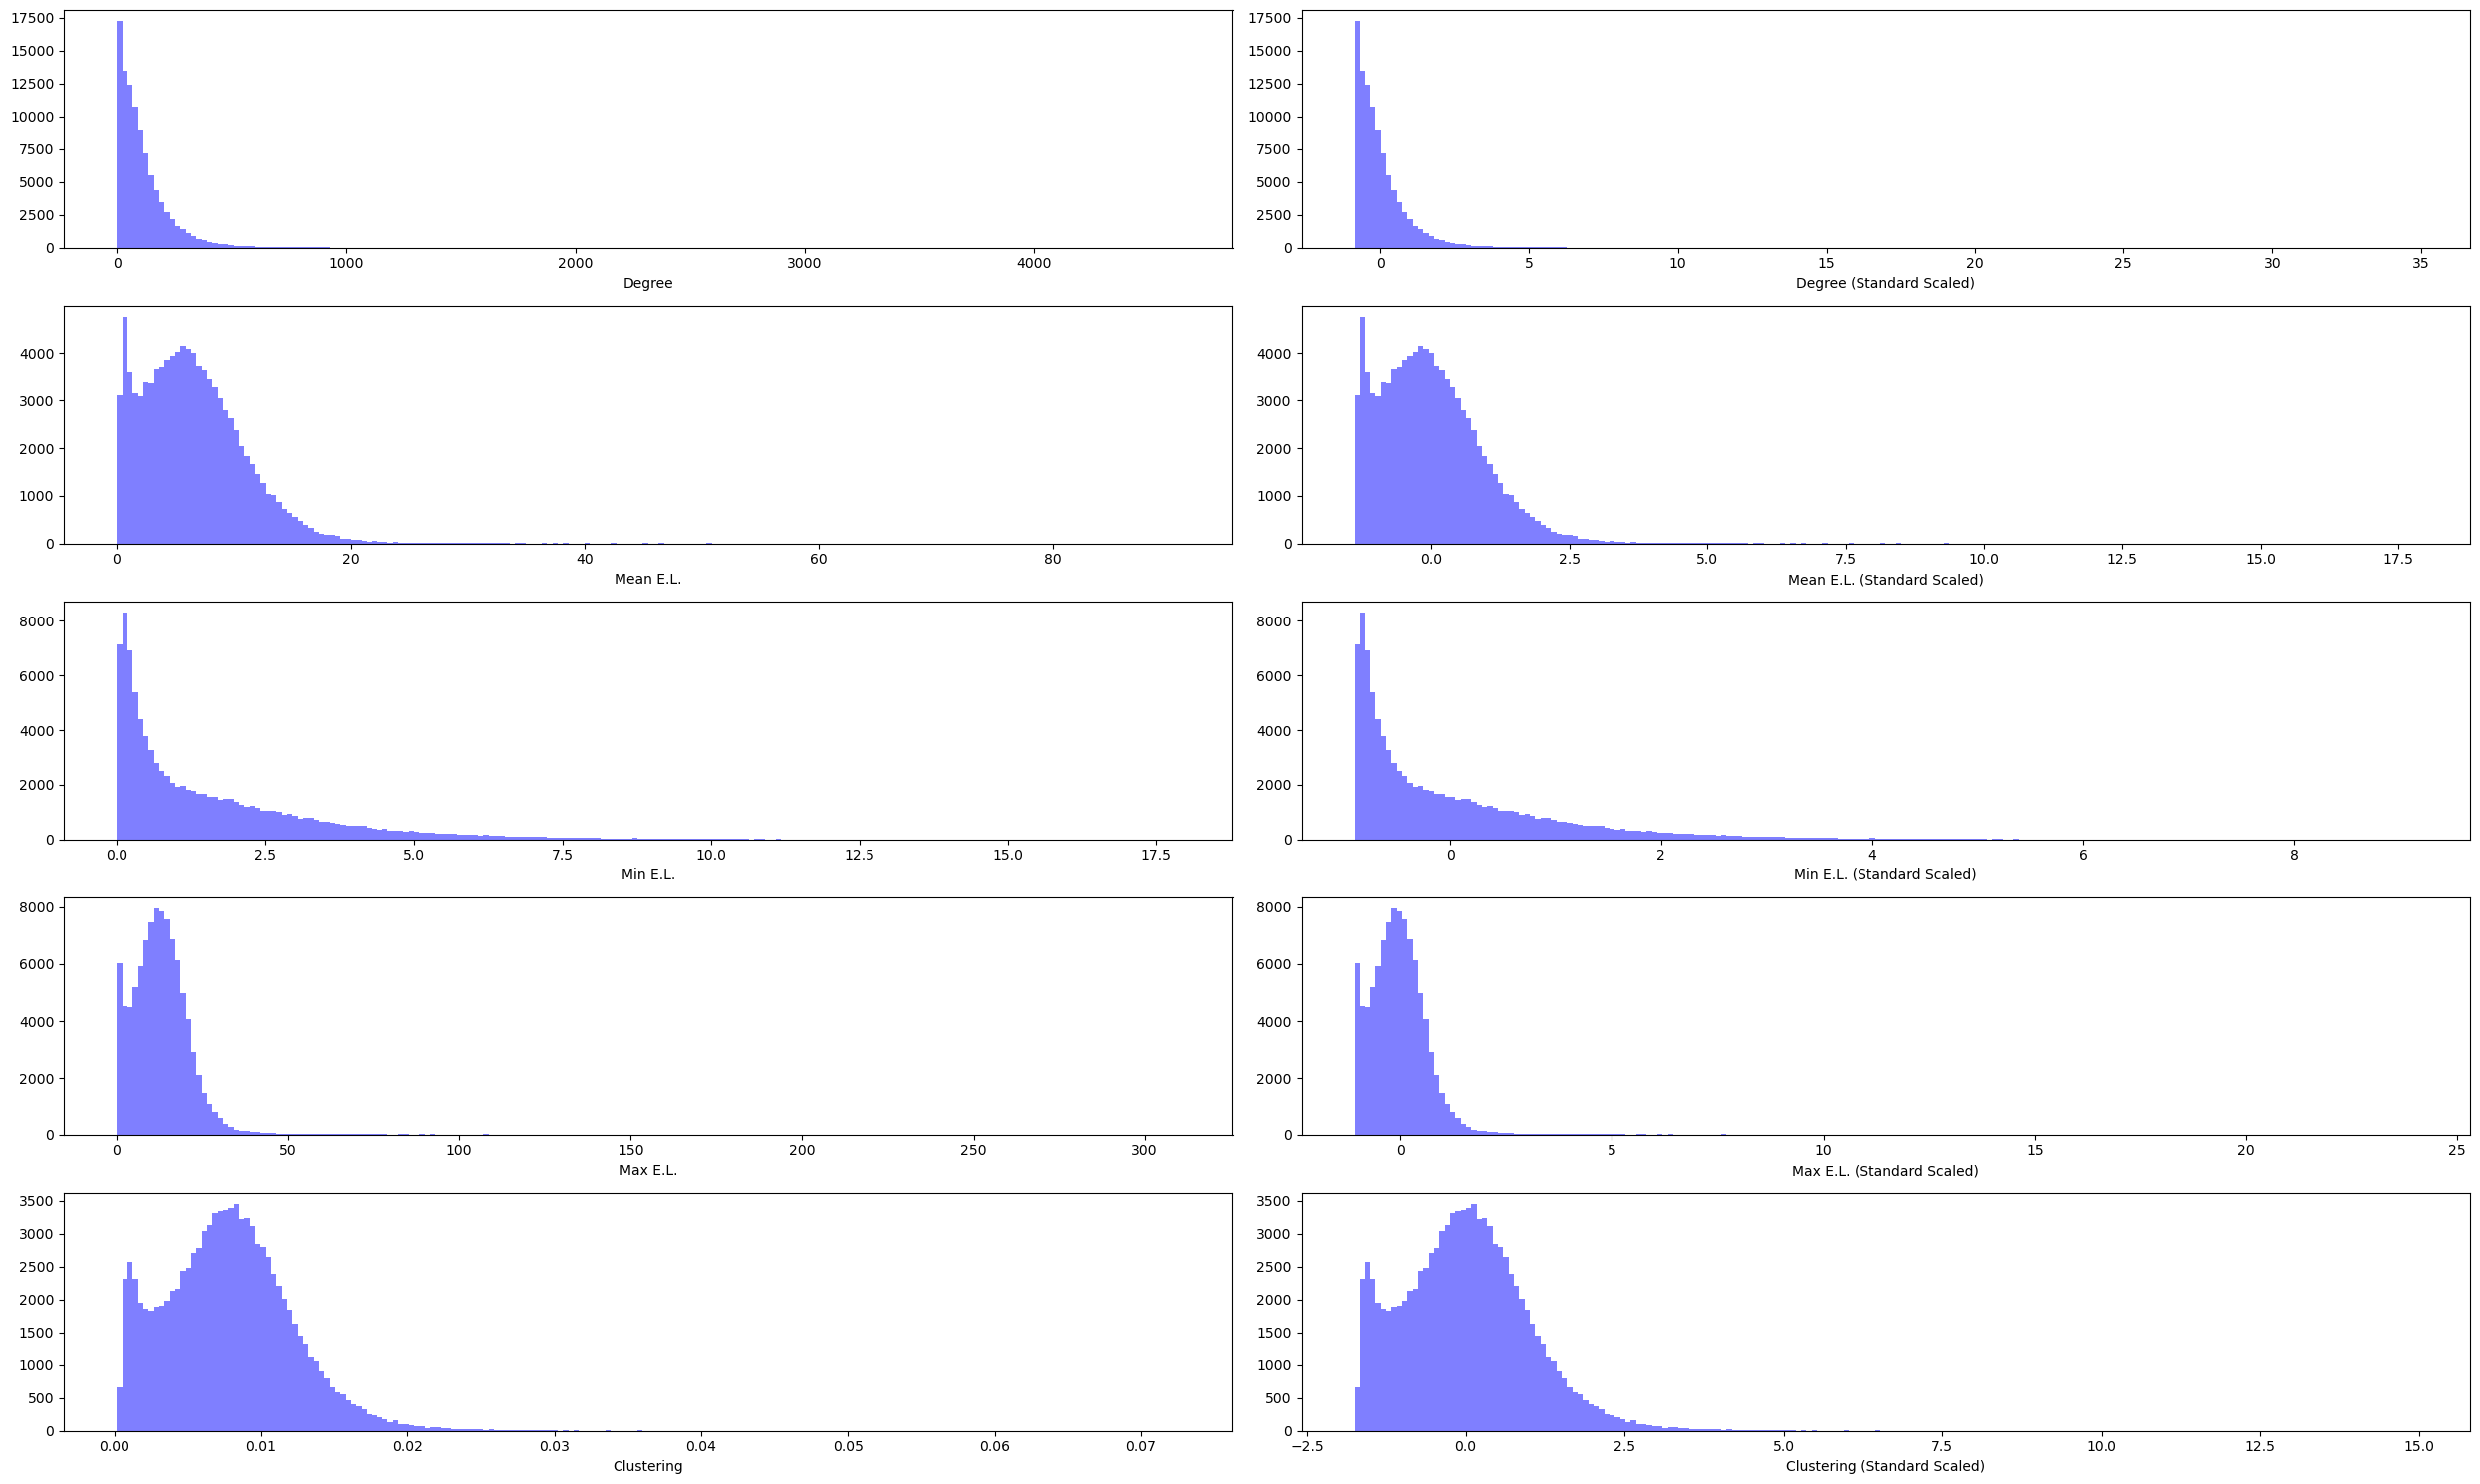

In [9]:
# Now plot histograms of all the other features in tab2, tab_standard, tab_minmax and tab_robust
tab_comp = tab_standard # change this to tab_minmax or tab_robust to compare

fig = plt.figure(figsize=(25, 15))
gs = gridspec.GridSpec(5, 2, width_ratios=[1, 1]) # 5 rows, 2 columns
ax0 = plt.subplot(gs[(0,0)])
ax1 = plt.subplot(gs[(0,1)])
ax2 = plt.subplot(gs[(1,0)])
ax3 = plt.subplot(gs[(1,1)])
ax4 = plt.subplot(gs[(2,0)])
ax5 = plt.subplot(gs[(2,1)])
ax6 = plt.subplot(gs[(3,0)])
ax7 = plt.subplot(gs[(3,1)])
ax8 = plt.subplot(gs[(4,0)])
ax9 = plt.subplot(gs[(4,1)])

ax0.hist(tab2['Degree'], bins=200, color='blue', alpha=0.5, label='Degree')
ax1.hist(tab_comp['Degree'], bins=200, color='blue', alpha=0.5, label='Degree')
ax2.hist(tab2['Mean E.L.'], bins=200, color='blue', alpha=0.5, label='Mean E.L.')
ax3.hist(tab_comp['Mean E.L.'], bins=200, color='blue', alpha=0.5, label='Mean E.L.')
ax4.hist(tab2['Min E.L.'], bins=200, color='blue', alpha=0.5, label='Min E.L.')
ax5.hist(tab_comp['Min E.L.'], bins=200, color='blue', alpha=0.5, label='Min E.L.')
ax6.hist(tab2['Max E.L.'], bins=200, color='blue', alpha=0.5, label='Max E.L.')
ax7.hist(tab_comp['Max E.L.'], bins=200, color='blue', alpha=0.5, label='Max E.L.')
ax8.hist(tab2['Clustering'], bins=200, color='blue', alpha=0.5, label='Clustering')
ax9.hist(tab_comp['Clustering'], bins=200, color='blue', alpha=0.5, label='Clustering')

ax0.set_xlabel('Degree')
ax1.set_xlabel('Degree {0}'.format('(Standard Scaled)' if tab_comp is tab_standard else '(Min-Max Scaled)' if tab_comp is tab_minmax else '(Robust Scaled)'))
ax2.set_xlabel('Mean E.L.')
ax3.set_xlabel('Mean E.L. {0}'.format('(Standard Scaled)' if tab_comp is tab_standard else '(Min-Max Scaled)' if tab_comp is tab_minmax else '(Robust Scaled)'))
ax4.set_xlabel('Min E.L.')
ax5.set_xlabel('Min E.L. {0}'.format('(Standard Scaled)' if tab_comp is tab_standard else '(Min-Max Scaled)' if tab_comp is tab_minmax else '(Robust Scaled)'))
ax6.set_xlabel('Max E.L.')
ax7.set_xlabel('Max E.L. {0}'.format('(Standard Scaled)' if tab_comp is tab_standard else '(Min-Max Scaled)' if tab_comp is tab_minmax else '(Robust Scaled)'))
ax8.set_xlabel('Clustering')
ax9.set_xlabel('Clustering {0}'.format('(Standard Scaled)' if tab_comp is tab_standard else '(Min-Max Scaled)' if tab_comp is tab_minmax else '(Robust Scaled)'))

fig.tight_layout()


Although the other features are not spread over as vast a scale as Density and Neigh Density thaey are not necessarily gaussian even before using standard scaler, minmax, or robust. It might therefore be appropriate to choose another scaling method - extreme values, several orders of magnitude higher in density, have an influence on the mean and std in standard scaler; the inliers are just compressed to a very small range near 0 to accommodate the extremes for minmax; though the centring and scaling for robust are not influenced by the bottom/top 25%, the range is larger due to the use of IQR and the outliers will still be present in the data. These are all linear transformations of the data which maintain the relative distances between the points.

What are the options?

https://scikit-learn.org/dev/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section

- PowerTransform: applies a power transformation to make the data more gaussian in nature to stabilise the skewness (degree of asymmetry) and stabilise variance

- QuantileTransformer (Gaussian output): like robustscaler but will collapse outliers by setting them to the apriori defined range boundaries [0,1] which can lead to saturation effects

PowerTransform is the one to try first

In [29]:
tab2

Degree  Mean E.L.  Min E.L.   Max E.L.  Clustering     Density  \
Node ID                                                                      
0         3.786575   0.252438  0.121074   0.610647    0.000323  185.880269   
1         3.439105   0.245650  0.158843   0.353270    0.000354  231.832891   
2         4.289986   0.428999  0.032403   0.740822    0.000867   34.527336   
3         5.261107   0.751587  0.044699   1.320098    0.001769    3.062777   
4         9.891149   0.760858  0.254148   1.141795    0.001110    4.098506   
...            ...        ...       ...        ...         ...         ...   
97228    81.350501   3.697750  0.803879  11.299435    0.003283    0.003181   
97229    74.863507   4.990900  0.789464  18.656740    0.006422    0.000498   
97230    40.762152   2.397774  1.058297   3.451464    0.002639    0.033671   
97231    51.334932   3.019702  1.092770   6.863998    0.003514    0.008619   
97232    48.661160   3.475797  1.631685   7.123101    0.004361    0.005870   

         Neigh Density  Target  
Node ID                         
0           175.964597     3.0  
1           282.636896     3.0  
2            41.029794     3.0  
3             1.367740     3.0  
4             5.143066     3.0  
...                ...     ...  
97228         0.272363     3.0  
97229         0.844022     2.0  
97230         0.064352     2.0  
97231         0.080914     2.0  
97232         0.017155     2.0  

[97233 rows x 8 columns]

In [30]:
# Apply PowerTransformer to the data and store as a different dataframe
from sklearn.preprocessing import PowerTransformer
tab_power = pd.DataFrame(PowerTransformer(method='box-cox').fit_transform(tab2.iloc[:,:-1]), columns=tab2.columns[:-1])
tab_power['Target'] = tab2['Target']
tab_power

Degree  Mean E.L.  Min E.L.  Max E.L.  Clustering   Density  \
0     -2.014559  -2.209860 -1.335262 -2.392986   -2.295939  2.042591   
1     -2.059378  -2.218986 -1.183516 -2.626377   -2.272979  2.058843   
2     -1.954994  -2.009095 -1.978620 -2.299263   -1.962275  1.903202   
3     -1.853995  -1.740171 -1.834865 -1.977976   -1.559856  1.644824   
4     -1.510958  -1.733531 -0.903389 -2.064904   -1.842394  1.680096   
...         ...        ...       ...       ...         ...       ...   
97228  0.053082  -0.500748 -0.112606 -0.008822   -1.035789  0.317239   
97229 -0.023423  -0.155902 -0.126290  0.707216   -0.190483 -0.277348   
97230 -0.542188  -0.926087  0.100690 -1.275551   -1.244007  0.902818   
97231 -0.353575  -0.709590  0.126222 -0.605979   -0.965002  0.585354   
97232 -0.398185  -0.566521  0.457799 -0.565096   -0.720098  0.485871   

       Neigh Density  Target  
0           1.869320     3.0  
1           1.913680     3.0  
2           1.717409     3.0  
3           1.250023     3.0  
4           1.453322     3.0  
...              ...     ...  
97228       0.958145     3.0  
97229       1.168144     2.0  
97230       0.648846     2.0  
97231       0.701324     2.0  
97232       0.318294     2.0  

[97233 rows x 8 columns]

In [35]:
# Apply QuantileTransformer (Gaussian) to the data and store as a different dataframe
from sklearn.preprocessing import QuantileTransformer
tab_quantile = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(tab2.iloc[:,:-1]), columns=tab2.columns[:-1])
tab_quantile['Target'] = tab2['Target']
tab_quantile

Degree  Mean E.L.  Min E.L.  Max E.L.  Clustering   Density  \
0     -1.970497  -2.547015 -1.285088 -2.349504   -3.167376  2.286511   
1     -2.031059  -2.586128 -1.093455 -3.008382   -3.090048  2.337385   
2     -1.882449  -1.989254 -2.132470 -2.160420   -1.916839  1.907704   
3     -1.770174  -1.529219 -1.911807 -1.687224   -1.374192  1.462181   
4     -1.399768  -1.520930 -0.776158 -1.801897   -1.706167  1.509492   
...         ...        ...       ...       ...         ...       ...   
97228  0.007413  -0.549677 -0.114358 -0.150473   -0.959328  0.362310   
97229 -0.069779  -0.254651 -0.124569  0.825877   -0.284515 -0.196279   
97230 -0.576528  -0.870606  0.046725 -1.217112   -1.119493  0.811162   
97231 -0.403097  -0.715666  0.067430 -0.744455   -0.906105  0.576102   
97232 -0.444082  -0.606595  0.334541 -0.709179   -0.726242  0.504189   

       Neigh Density  Target  
0           2.248038     3.0  
1           2.399740     3.0  
2           1.762739     3.0  
3           1.001590     3.0  
4           1.255805     3.0  
...              ...     ...  
97228       0.754276     3.0  
97229       0.920197     2.0  
97230       0.542403     2.0  
97231       0.573834     2.0  
97232       0.319698     2.0  

[97233 rows x 8 columns]

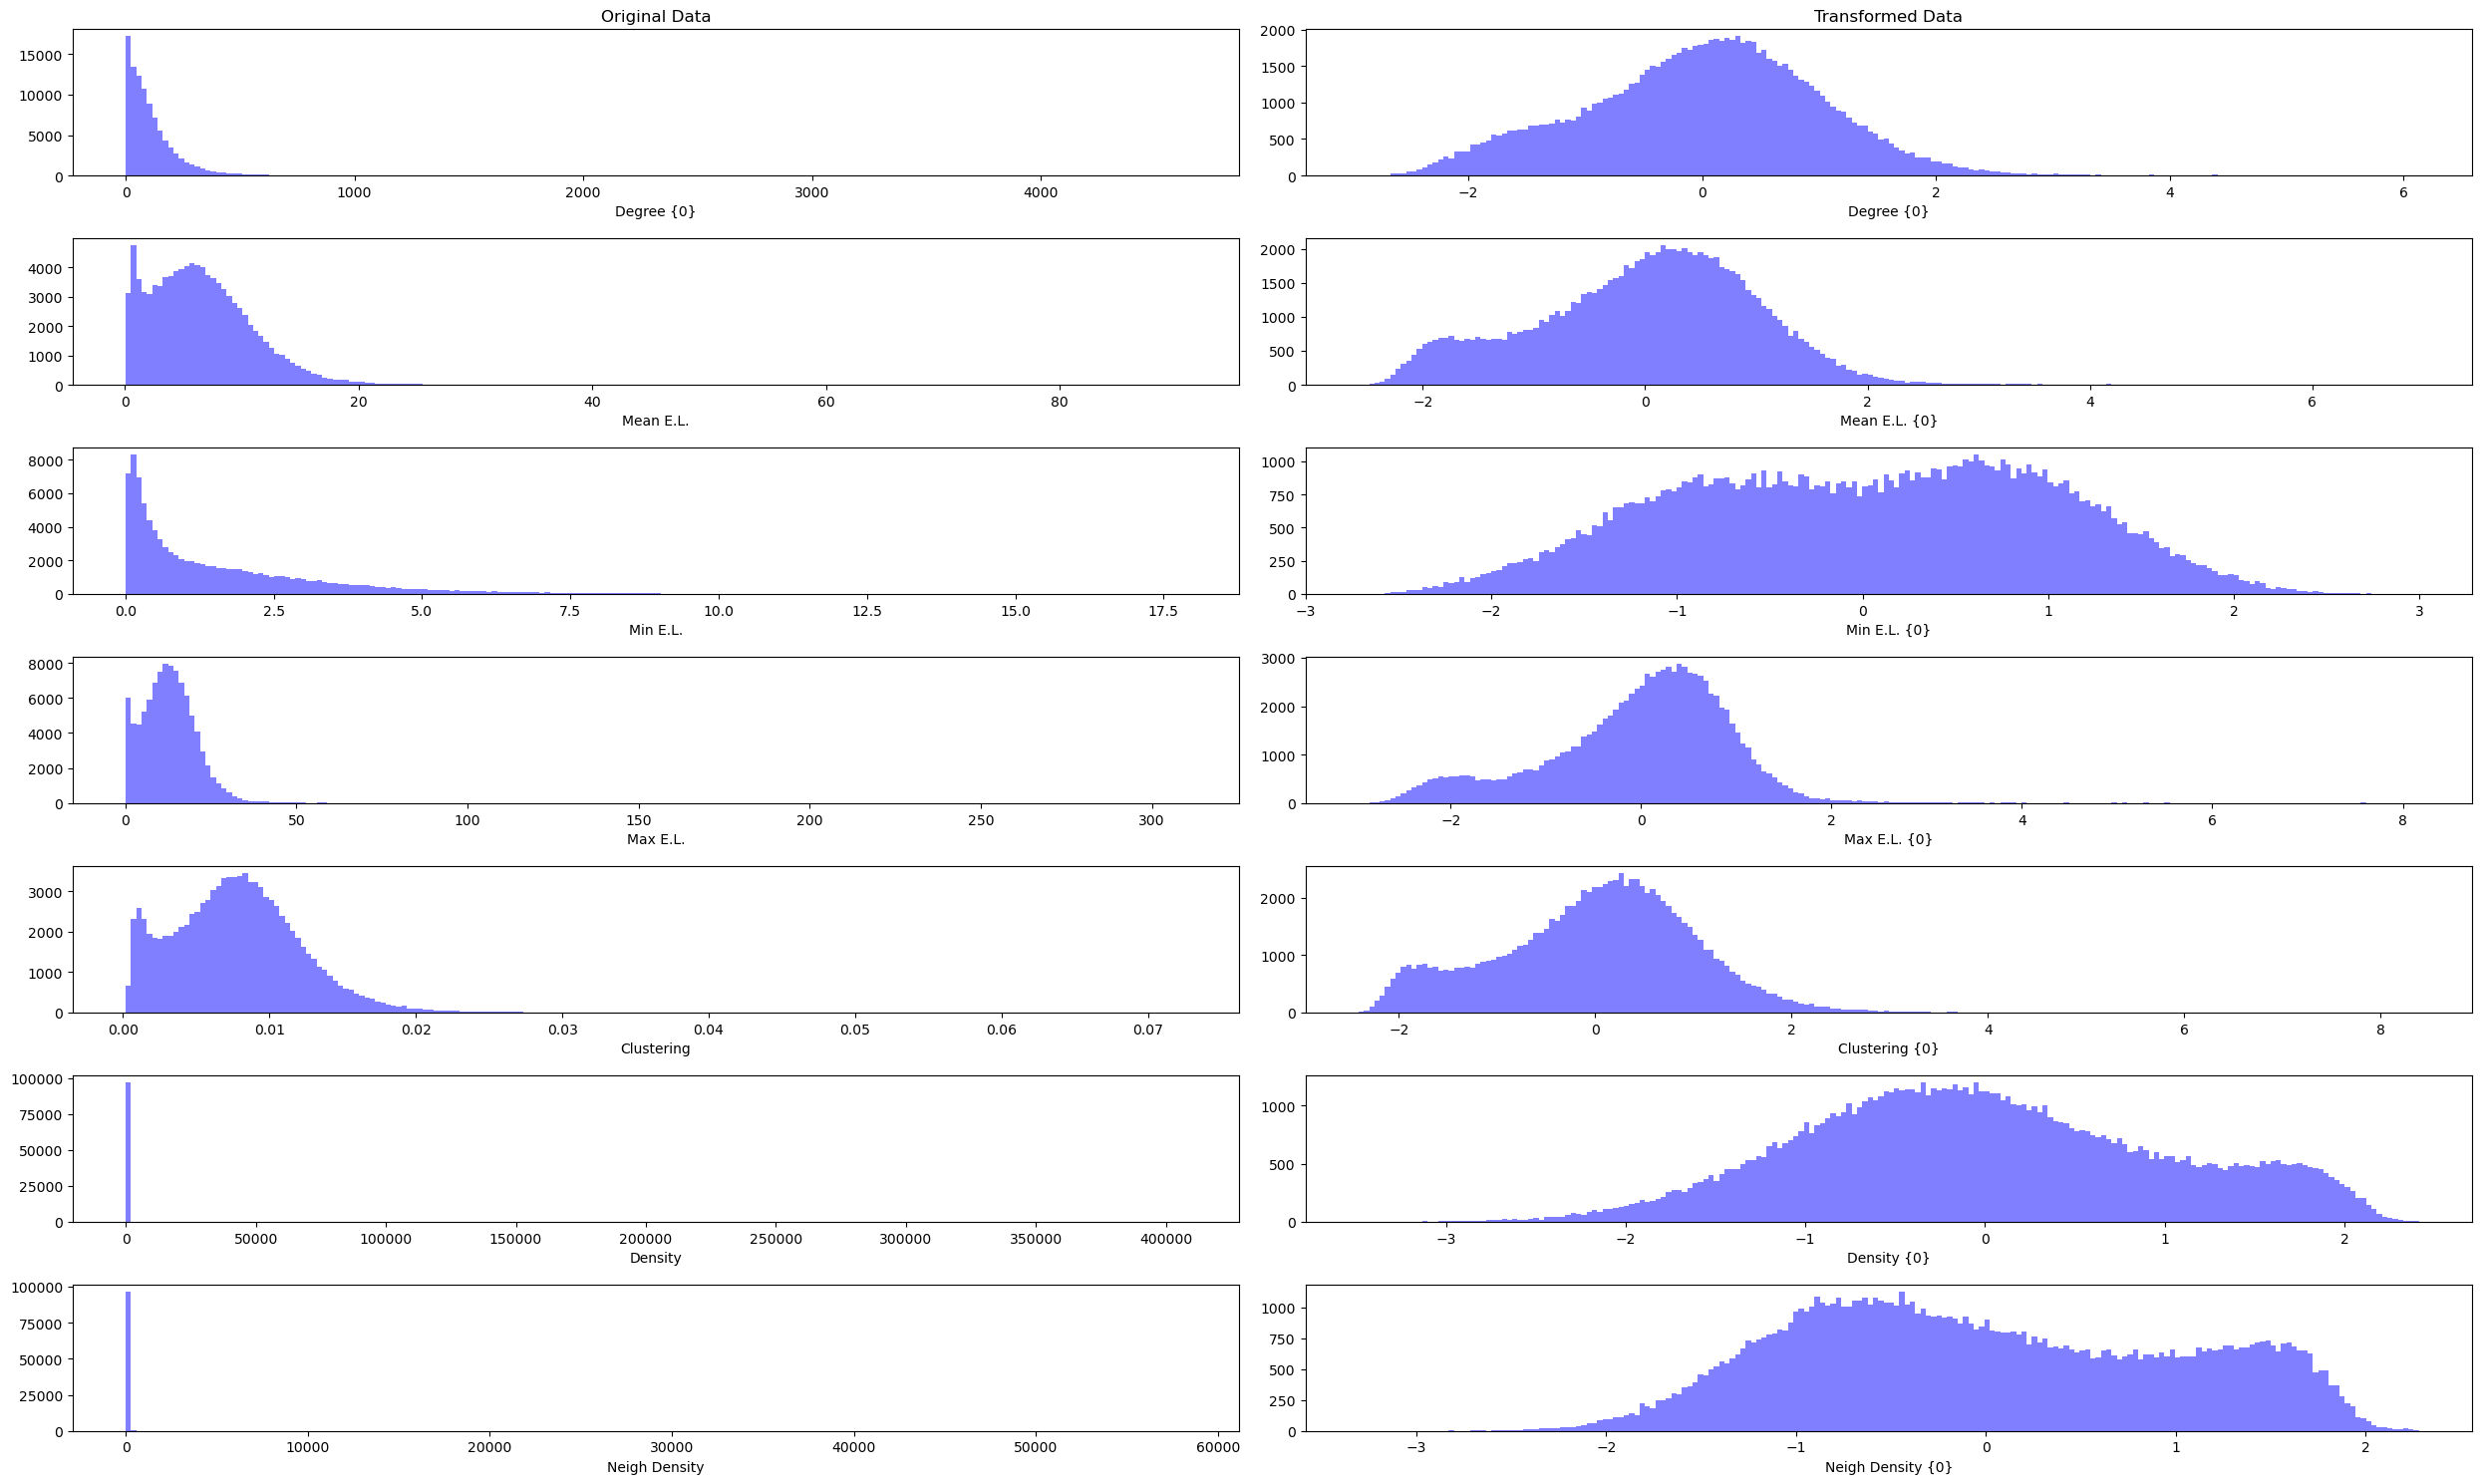

In [47]:
tab_LH = tab2.copy()
tab_RH = tab_power.copy()
#  Plot histograms of the data after applying PowerTransformer
fig = plt.figure(figsize=(25, 15))
gs = gridspec.GridSpec(7, 2, width_ratios=[1, 1]) # 6 rows, 2 columns
ax0 = plt.subplot(gs[(0,0)])
ax1 = plt.subplot(gs[(0,1)])
ax2 = plt.subplot(gs[(1,0)])
ax3 = plt.subplot(gs[(1,1)])
ax4 = plt.subplot(gs[(2,0)])
ax5 = plt.subplot(gs[(2,1)])
ax6 = plt.subplot(gs[(3,0)])
ax7 = plt.subplot(gs[(3,1)])
ax8 = plt.subplot(gs[(4,0)])
ax9 = plt.subplot(gs[(4,1)])
ax10 = plt.subplot(gs[(5,0)])
ax11 = plt.subplot(gs[(5,1)])
ax12 = plt.subplot(gs[(6,0)])
ax13 = plt.subplot(gs[(6,1)])

ax0.hist(tab_LH['Degree'], bins=200, color='blue', alpha=0.5, label='Degree')
ax1.hist(tab_RH['Degree'], bins=200, color='blue', alpha=0.5, label='Degree')
ax2.hist(tab_LH['Mean E.L.'], bins=200, color='blue', alpha=0.5, label='Mean E.L.')
ax3.hist(tab_RH['Mean E.L.'], bins=200, color='blue', alpha=0.5, label='Mean E.L.')
ax4.hist(tab_LH['Min E.L.'], bins=200, color='blue', alpha=0.5, label='Min E.L.')
ax5.hist(tab_RH['Min E.L.'], bins=200, color='blue', alpha=0.5, label='Min E.L.')
ax6.hist(tab_LH['Max E.L.'], bins=200, color='blue', alpha=0.5, label='Max E.L.')
ax7.hist(tab_RH['Max E.L.'], bins=200, color='blue', alpha=0.5, label='Max E.L.')
ax8.hist(tab_LH['Clustering'], bins=200, color='blue', alpha=0.5, label='Clustering')
ax9.hist(tab_RH['Clustering'], bins=200, color='blue', alpha=0.5, label='Clustering')
ax10.hist(tab_LH['Density'], bins=200, color='blue', alpha=0.5, label='Density')
ax11.hist(tab_RH['Density'], bins=200, color='blue', alpha=0.5, label='Density')
ax12.hist(tab_LH['Neigh Density'], bins=200, color='blue', alpha=0.5, label='Neigh Density')
ax13.hist(tab_RH['Neigh Density'], bins=200, color='blue', alpha=0.5, label='Neigh Density')

ax0.set_xlabel('Degree {0}')
ax1.set_xlabel('Degree {0}')
ax2.set_xlabel('Mean E.L.')
ax3.set_xlabel('Mean E.L. {0}')
ax4.set_xlabel('Min E.L.')
ax5.set_xlabel('Min E.L. {0}')
ax6.set_xlabel('Max E.L.')
ax7.set_xlabel('Max E.L. {0}')
ax8.set_xlabel('Clustering')
ax9.set_xlabel('Clustering {0}')
ax10.set_xlabel('Density')
ax11.set_xlabel('Density {0}')
ax12.set_xlabel('Neigh Density')
ax13.set_xlabel('Neigh Density {0}')

ax0.set_title('Original Data')
ax1.set_title('Transformed Data')

fig.tight_layout()

Text(0, 0.5, 'Frequency')

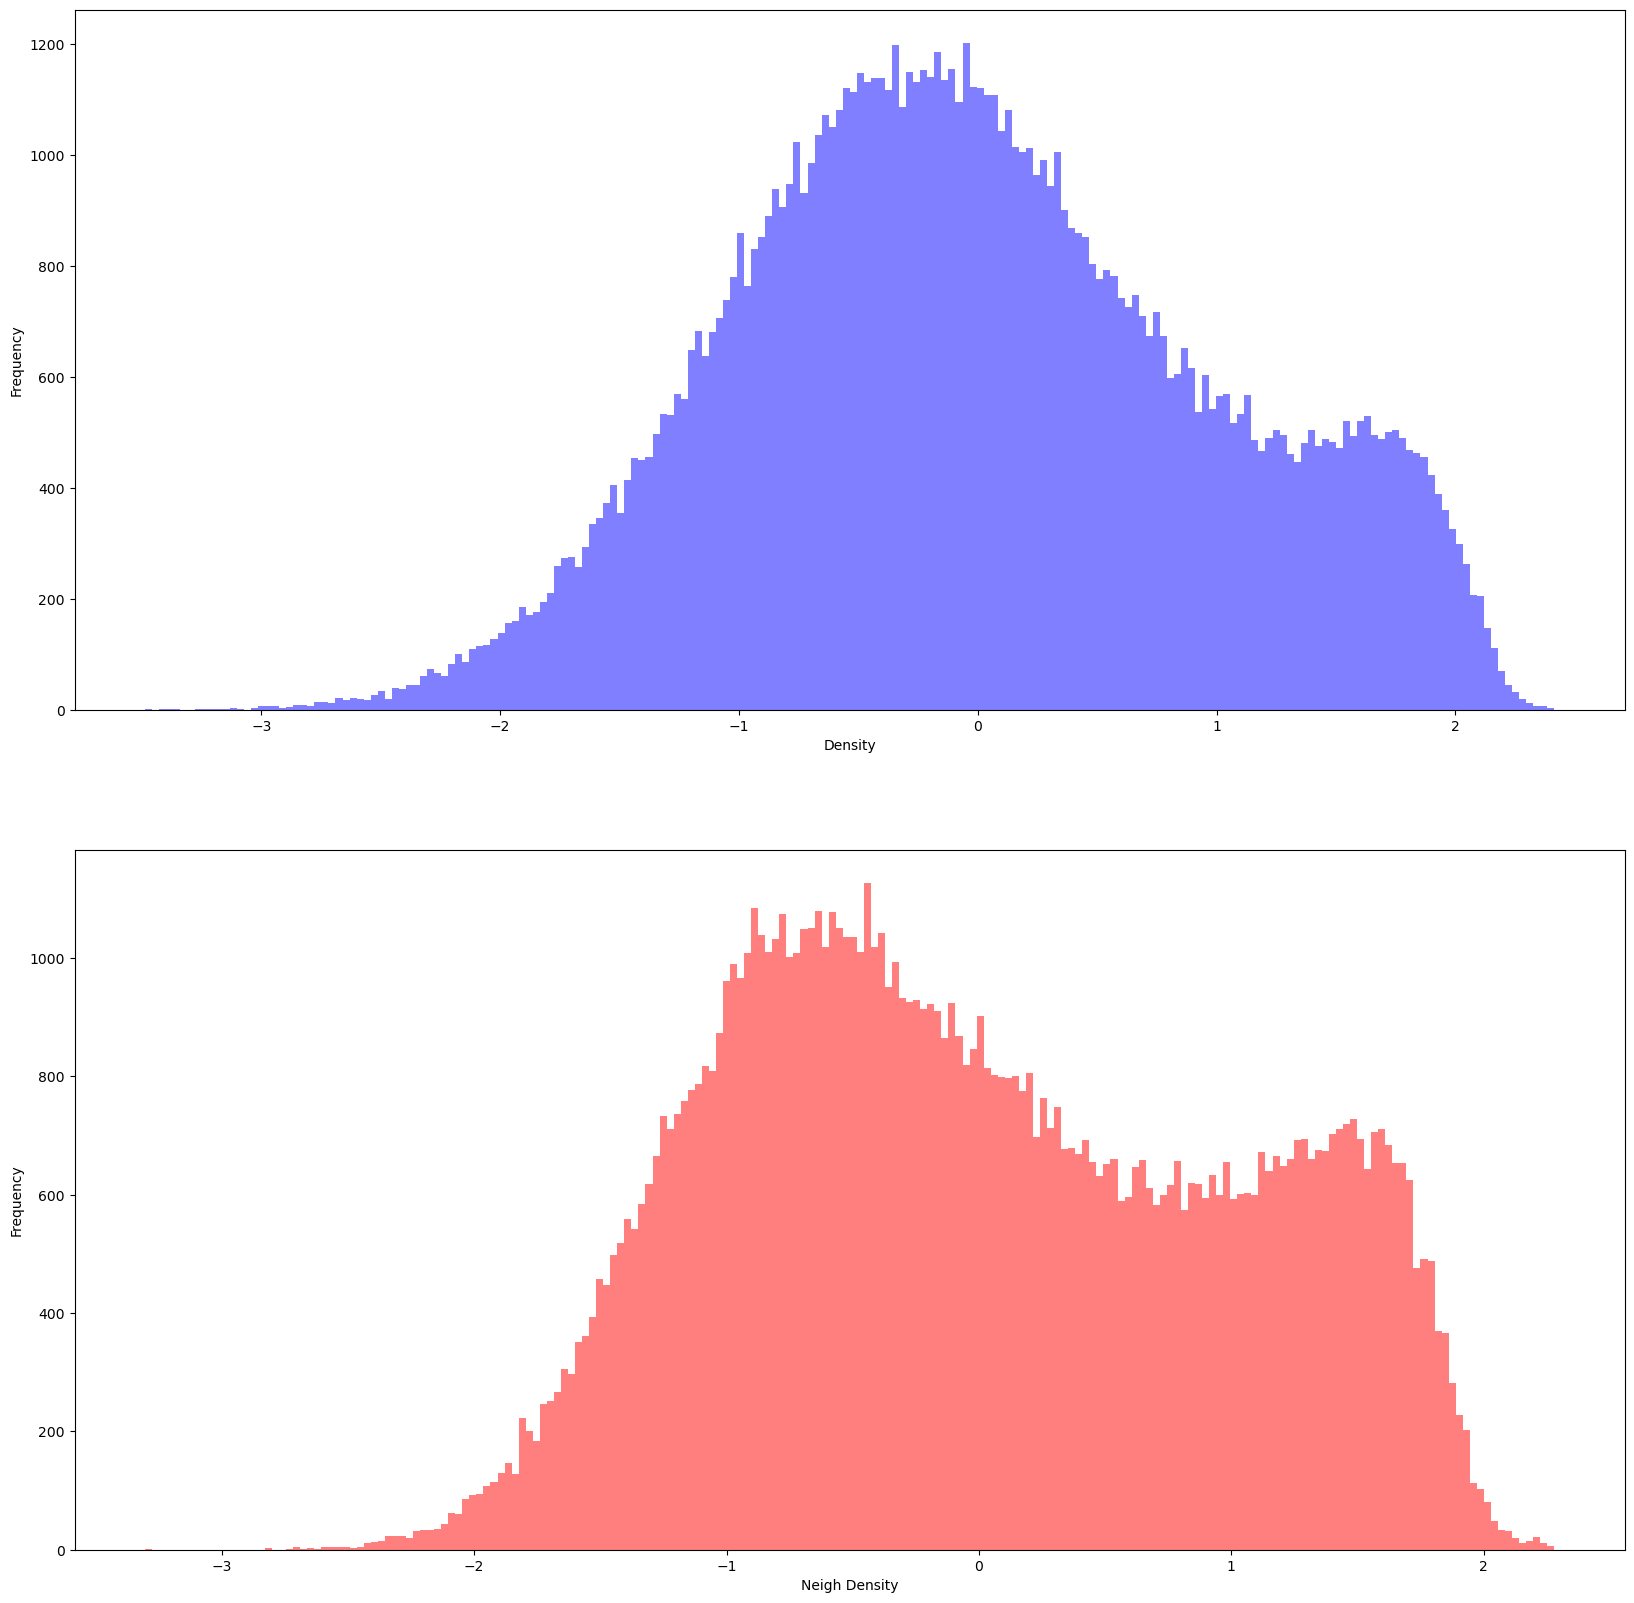

In [48]:
fig, axs  = plt.subplots(2, figsize=(20, 20))
axs[0].hist(tab_RH['Density'], bins=200, color='blue', alpha=0.5, label='Density', log=False)
axs[1].hist(tab_RH['Neigh Density'], bins=200, color='red', alpha=0.5, label='Neigh Density', log=False)
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Frequency')
axs[1].set_xlabel('Neigh Density')
axs[1].set_ylabel('Frequency')


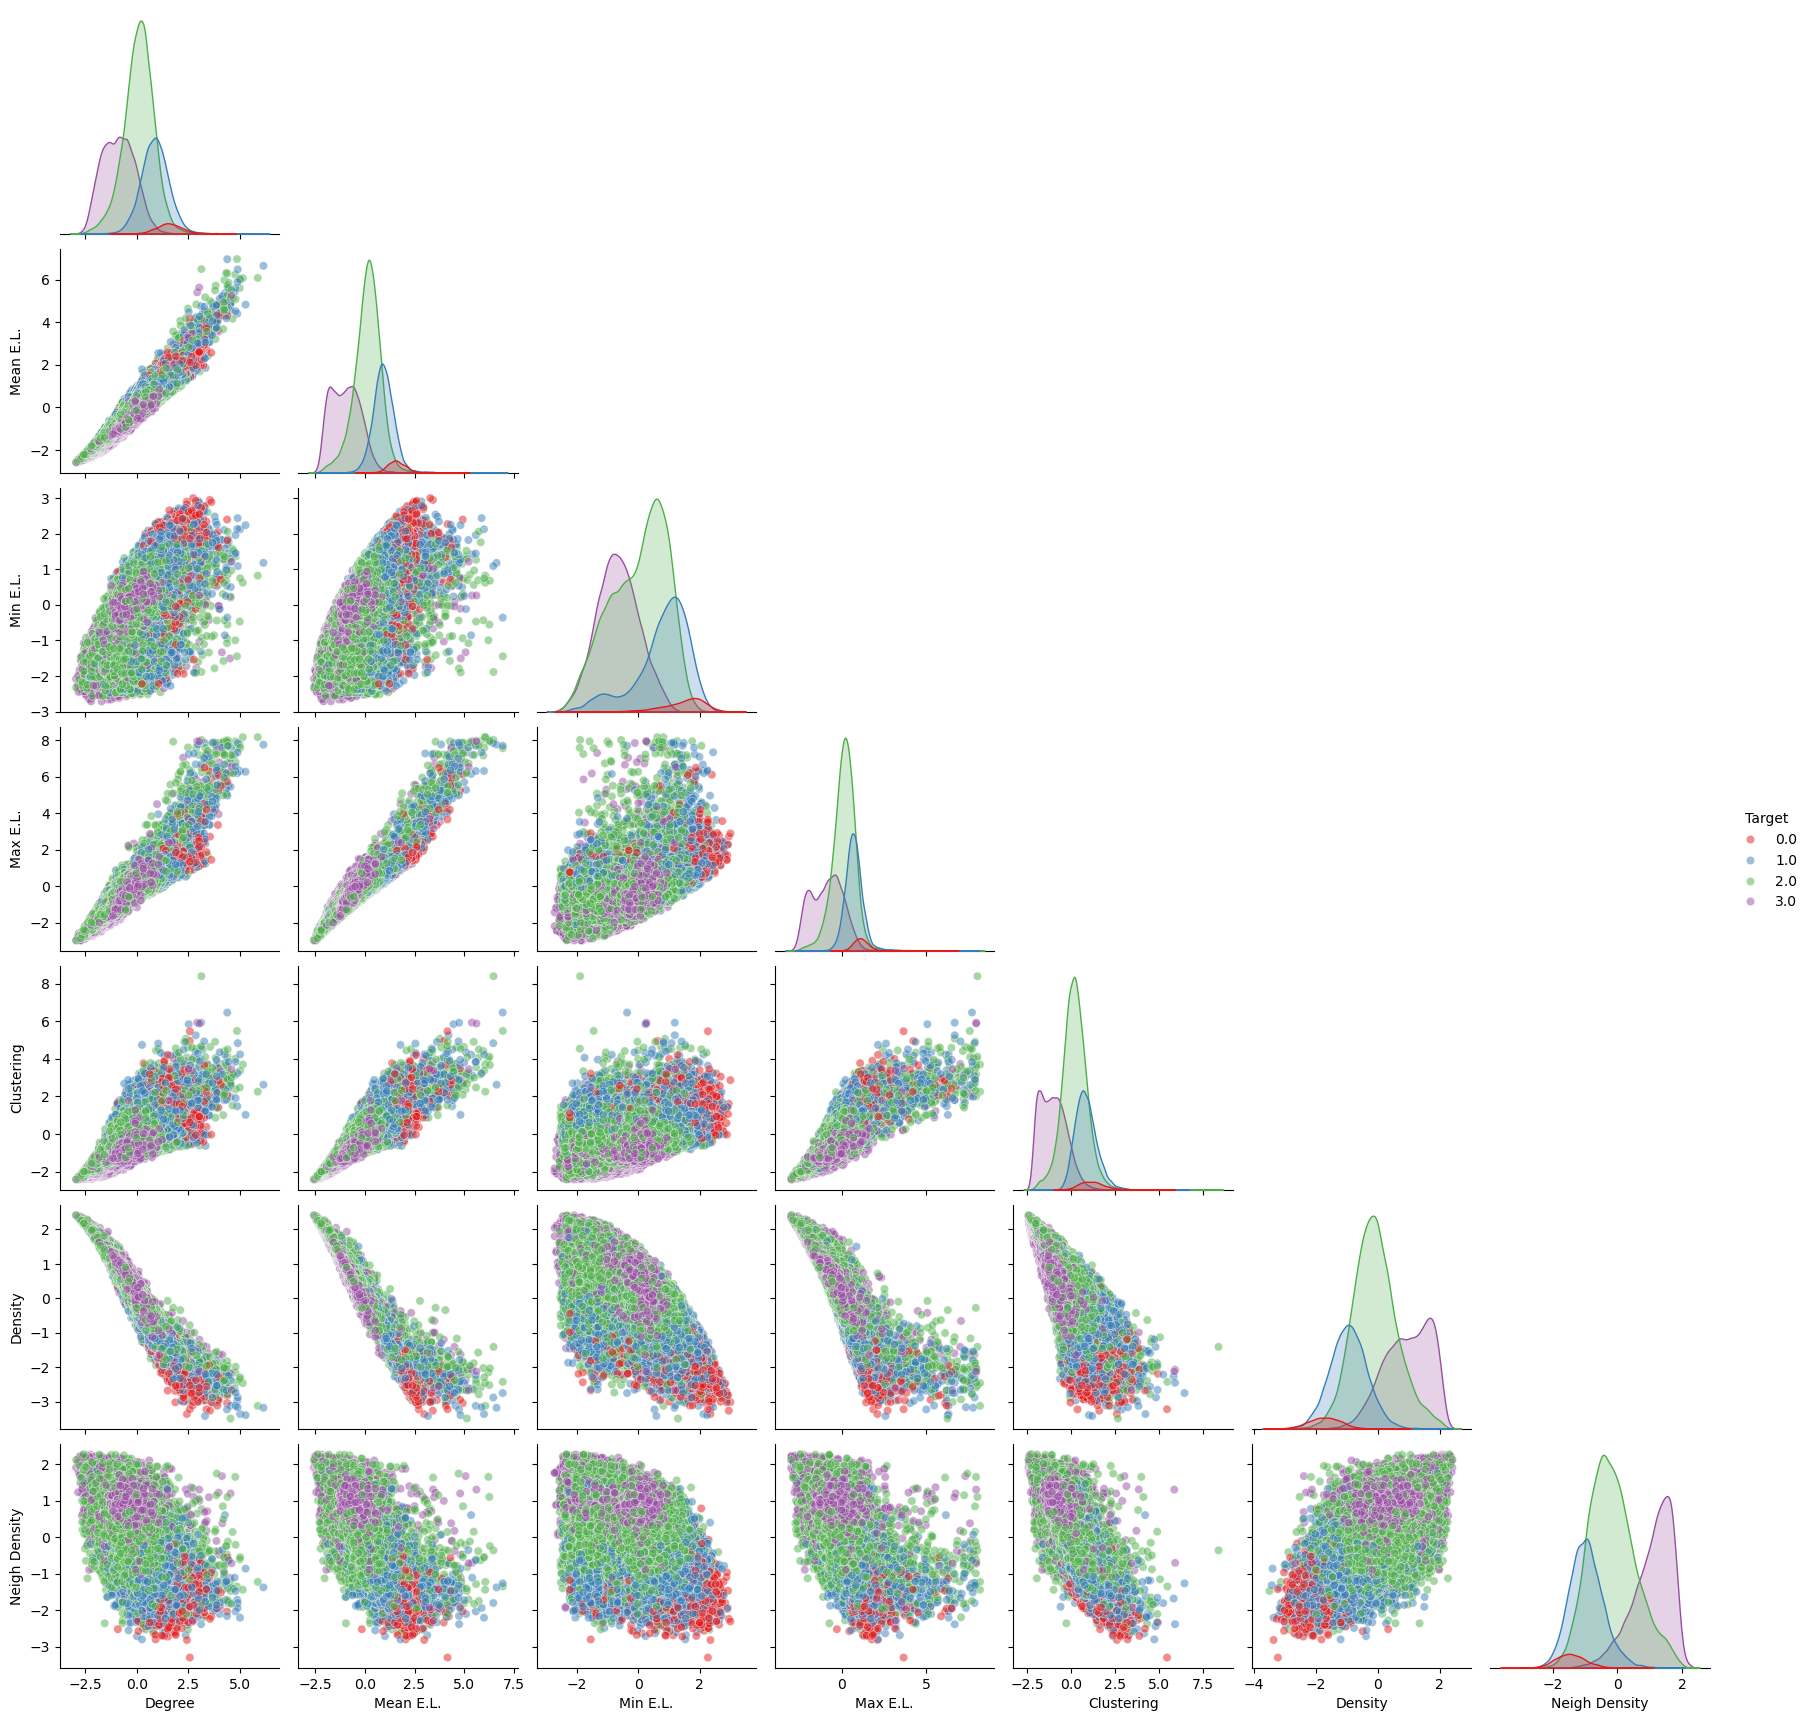

In [49]:
pairplot = sns.pairplot(tab_RH, hue='Target', palette='Set1', diag_kind='kde', markers='o', plot_kws={'alpha':0.5}, corner=True)

# sns.pairplot(tab_power, hue = 'Target', palette='Set1', plot_kws={'alpha':0.5})

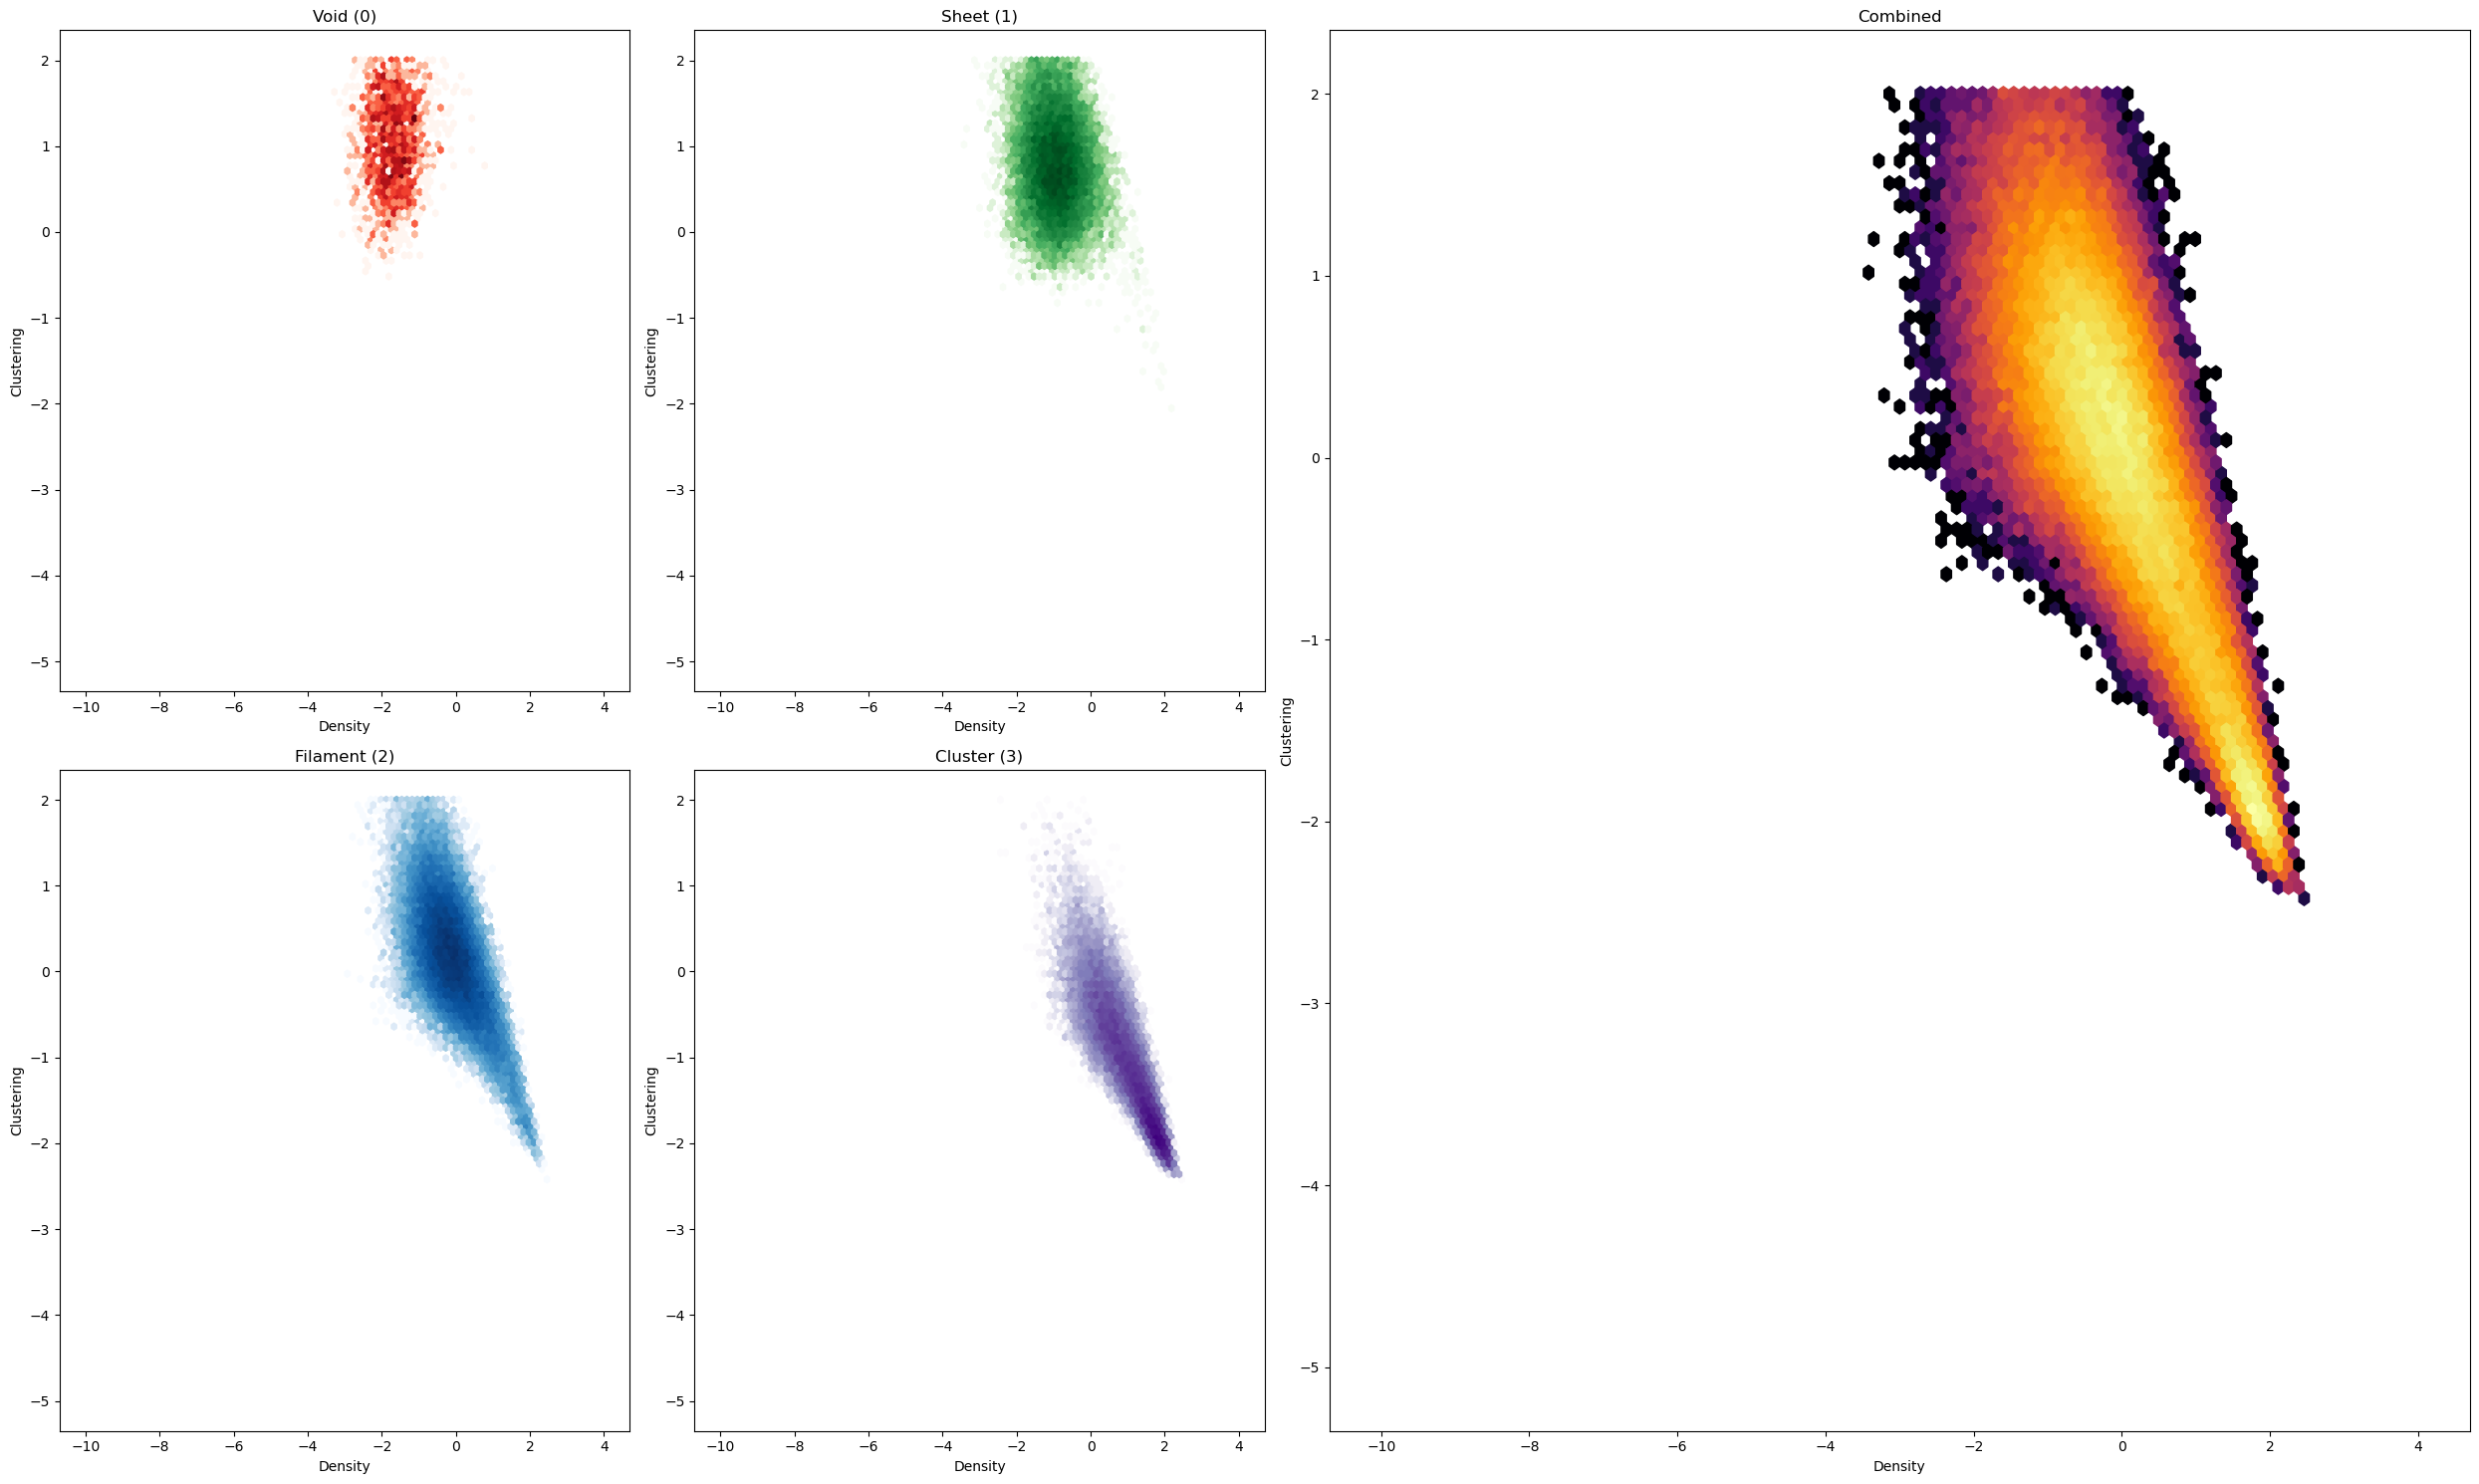

In [57]:
# Doing same as above but with gridspec so that the combined plot is bigger
# Plotting the cross correlations of the data
x = 'Density'
y = 'Clustering'
tab = tab_power ############################################################################################################# Change this to tab_standard, tab_minmax, tab_robust
xscale = 'linear'
yscale = 'linear'
bins = 'log'
from matplotlib import gridspec

# extent = None
if y == 'Degree':
    extent = [-7, 4, -2, 5]
elif y == 'Clustering':
    extent = [-10, 4, -5, 2]
else:
    extent = [-5, -5, -2, 10]

fig = plt.figure(figsize=(25, 15))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 2])
ax0 = plt.subplot(gs[(0,0)])
ax1 = plt.subplot(gs[(0,1)])
ax2 = plt.subplot(gs[(1,0)])
ax3 = plt.subplot(gs[(1,1)])
ax4 = plt.subplot(gs[:,2])

ax0.hexbin(tab[tab['Target'] == 0][x], tab[tab['Target'] == 0][y], bins=bins, cmap='Reds', xscale=xscale, yscale=yscale, extent=extent)
ax0.set_title('Void (0)')
ax0.set_xlabel(x)
ax0.set_ylabel(y)
ax1.hexbin(tab[tab['Target'] == 1][x], tab[tab['Target'] == 1][y], bins=bins, cmap='Greens', xscale=xscale, yscale=yscale, extent=extent)
ax1.set_title('Sheet (1)')
ax1.set_xlabel(x)
ax1.set_ylabel(y)
ax2.hexbin(tab[tab['Target'] == 2][x], tab[tab['Target'] == 2][y], bins=bins, cmap='Blues', xscale=xscale, yscale=yscale, extent=extent)
ax2.set_title('Filament (2)')
ax2.set_xlabel(x)
ax2.set_ylabel(y)
ax3.hexbin(tab[tab['Target'] == 3][x], tab[tab['Target'] == 3][y], bins=bins, cmap='Purples', xscale=xscale, yscale=yscale, extent=extent)
ax3.set_title('Cluster (3)')
ax3.set_xlabel(x)
ax3.set_ylabel(y)
ax4.hexbin(tab[x], tab[y], bins=bins, cmap='inferno', xscale=xscale, yscale=yscale, extent=extent)
ax4.set_title('Combined')
ax4.set_xlabel(x)
ax4.set_ylabel(y)

plt.tight_layout()

Power Transformation does the best job. When testing the quantile transform the output distributions were more gaussian than PT but they would have suffered from cut off effects as all data below or above a cut off was set at the cut off, this was most easily seen in the pairplot. PT has now transformed the data 

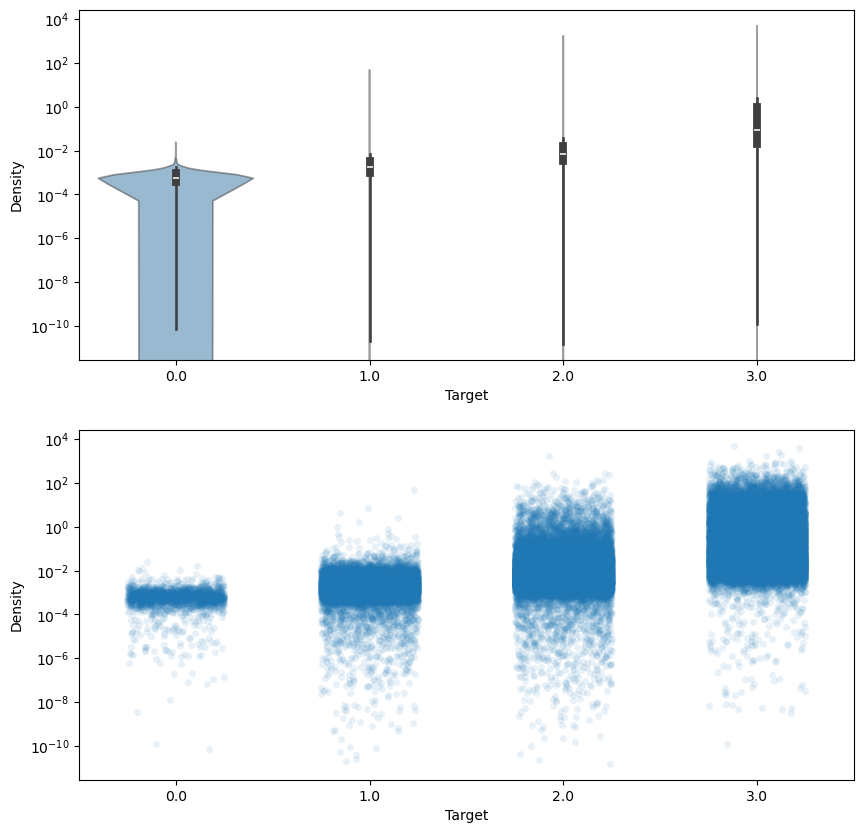

In [10]:
fig, axs = plt.subplots(2,figsize=(10,10))
# Change y to the column you want to plot
sns.violinplot(data=tab, x='Target', y='Density', alpha=0.5, ax=axs[0])
sns.stripplot(data=tab, x='Target', y='Density', alpha=0.1, ax=axs[1], jitter=0.25)
axs[0].set_yscale('log')
axs[1].set_yscale('log')